# Scraping Portal Berita

- Nama: Muhammad Habibulloh
- Email: habibmuhammadoct@gmail.com

## Detik.com Scraping

In [ ]:
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import requests
import pandas as pd
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi
MAX_WORKERS = 15
DELAY = 0.2
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"

In [ ]:
kategori1 = ['finance', 'inet', 'sport', 'oto', 'travel', 'food', 'health']
kategori2 = ['edu', 'properti']
halaman = 50
berita = []

In [ ]:
def process_kategori1(session, kategori):
    all_links = []

    # Fase 1: Kumpulkan semua link
    for page in range(1, halaman+1):
        try:
            url = f'https://{kategori}.detik.com/indeks?page={page}'
            res = session.get(url, timeout=10)
            soup = BeautifulSoup(res.text, 'lxml')
            articles = soup.select('article.list-content__item')

            for article in articles:
                title = article.find('h3', class_='media__title').text.strip()
                if not title.startswith(('Video', 'Infografis')):
                    all_links.append(article.find('a')['href'])

            time.sleep(np.random.uniform(DELAY/2, DELAY))  # Delay

        except Exception as e:
            print(f"Error di {url}: {str(e)}")
            continue

    # Fase 2: Proses konten paralel
    def process_link(link):
        try:
            res = session.get(link, timeout=15)
            soup = BeautifulSoup(res.text, 'lxml')
            article = soup.find('article', class_='detail')

            tanggal = soup.find('div', class_='detail__date').text.split(',')[1].strip().split()[:3]

            return {
                'judul': article.find('h1').text.strip(),
                'tanggal': ' '.join(tanggal),
                'konten': '\n'.join([p.text.strip() for p in article.select('div.detail__body-text > p')]),
                'kategori': kategori
            }
        except:
            return None

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        results = executor.map(process_link, all_links)
        for result in results:
            if result:
                berita.append(result)
                print(f"{kategori}: {result['judul'][:30]}...")

# Eksekusi
with requests.Session() as session:
    session.headers.update({'User-Agent': USER_AGENT})
    for kategori in kategori1:
        print(f"\nMemulai kategori: {kategori.upper()}")
        process_kategori1(session, kategori)


Memulai kategori: FINANCE
finance: THR PNS Dipastikan Cair Full, ...


finance: Dunia Lagi Perang Dagang, Prab...
finance: Soroti Perang Dagang AS & Kana...
finance: Belanja Negara Tembus Rp 348,1...
finance: Pelni Tak Beri Diskon Tiket sa...
finance: Sri Mulyani Umumkan APBN Tekor...
finance: Budi Arie Cabut Izin Koperasi ...
finance: Flash Sale KAI 18 Maret: Harga...
finance: Setoran Pajak Februari Anjlok ...
finance: Kereta Cadangan Terbakar di St...
finance: Sri Mulyani Beberkan Alasan Ni...
finance: Kereta Cadangan Terbakar di St...
finance: Pengusaha Minta Pemerintah Tin...
finance: Pertamina Fasilitasi Sertifika...
finance: Sri Mulyani Umumkan APBN Sudah...
finance: Tak Laporkan Kinerja APBN Janu...
finance: PTPP Pastikan Pelebaran Lajur ...
finance: Harga Emas Hari Ini Naik Segin...
finance: Kondisi Kapal Tanker Hangus Us...
finance: Grab Buka-bukaan Syarat Driver...
finance: Dolar AS Pagi Ini Menguat ke L...
finance: Eksplorasi Pertamina di Perair...
finance: DPRD Minta Pramono Prioritaska...
finance: IHSG Dibuka Merah, Melemah ke ...
finance: Be

finance: Capai Ratusan Juta, Ini PNS de...
finance: Wamen PU Ungkap Permintaan Pra...
finance: GoPay Ikut Perangi Judi Online...
finance: Pertamina Hulu Energi Bidik Pr...
finance: Hendra Lembong Jadi Dirut Baru...
finance: Kisah UMKM Ina Cookies Penjual...
finance: Wajib Cair H-7 Lebaran 2025, B...
finance: Investor Swasta Minat Bangun T...
finance: Pembentukan Family Office Samp...
finance: PGN Beberkan Jurus Gaet Pelang...
finance: Terungkap Biang Kerok BBN Airl...
finance: RI Perlu Lakukan Ini buat Opti...
finance: Alasan Ifan Seventeen Ditunjuk...
finance: PIS Raih 8 Penghargaan di 17th...
finance: Pemerintah Bentuk Satgas Khusu...
finance: Baru Mengudara 6 Bulan di RI, ...
finance: Blokir Anggaran PU Dibuka, Gaj...
finance: Berburu Uang Baru untuk Persia...
finance: Wamenperin Respons Imbauan WFA...
finance: Anggaran Pupuk Subsidi Bakal D...
finance: Kementerian BUMN Benarkan Ifan...
finance: BRI Life Catatkan Pertumbuhan ...
finance: Wamenperin Berharap Industri D...
finance: La

finance: Luhut Minta Makan Bergizi Grat...
finance: Segini Besaran THR PNS yang Me...
finance: Lengkap! Daftar Aplikasi Inova...
finance: Luhut Tiba-tiba Datangi Kantor...
finance: PTDI Kejar Produksi 143 Pesawa...
finance: Profil PFN, BUMN 'Si Unyil' ya...
finance: BRI & Bank Raya Mudahkan Anak ...
finance: 3 Gerbong Kereta Terbakar di S...
finance: KAI Jual 2.000 Tiket Kereta Mu...
finance: 2 Rangkaian KRL Impor Tambahan...
finance: Pembangkit Bertambah, PLN Tamb...
finance: Pengusaha Protes SKB Pelaranga...
finance: Pasar Pasir Gintung Sepi Ditin...
finance: RI Punya 15 Ribu KM Jalur Mine...
finance: Cara Tukar Minyak Jelantah Jad...
finance: Kantor PFN Ramai Karangan Bung...
finance: Bank BUMN Pastikan Layanan Tet...
finance: BUMN Jamin Stok Benih Padi Ama...
finance: Dolar AS Ngamuk, Tembus Rp 16....
finance: Harga Emas Hari Ini Terbang Ti...
finance: SKK Migas: Eksplorasi Sumur Ca...
finance: IHSG Hari Ini Dibuka Menguat D...
finance: Kebijakan Tarif Trump Hantam E...
finance: Ka

finance: THR-Bonus Hari Raya Tak Cair, ...
finance: Dukung Hilirisasi, ANTAM Sorot...
finance: Rapat di DPR, Bos Pertamina Ja...
finance: Zulhas Minta Produsen Nakal ya...
finance: Marak Penipuan Lewat SMS, OJK ...
finance: Kuasai 10% Cadangan Nikel RI, ...
finance: Penjelasan Lengkap Prabowo soa...
finance: Terima Banyak Keluhan, Bos Per...
finance: Menaker-Komisi IX DPR Bahas Sr...
finance: Dukung Swasembada Energi, PHE ...
finance: Kupas Tuntas Kesiapan Indonesi...
finance: Pertamina Sebut Telah Uji Samp...
finance: Mentan Beberkan Laporan soal B...
finance: Kantor Asuransi di Inggris Dis...
finance: PTPN Group di 2021-2024 Raih L...
finance: DPR Dukung Pemerintah Wujudkan...
finance: Geliat Penjualan Ondel-ondel M...
finance: Prabowo Pastikan THR PNS-TNI/P...
finance: Hilirisasi Bisa Jadi Jalan Kel...
finance: Simak! 5 Poin Penting soal Bon...
finance: Begini Hitung-hitungan THR Kar...
finance: Raih Ketenangan Ramadan dengan...
finance: Prabowo: Gaji ke-13 ASN Cair M...
finance: 58

finance: Pertamina Beberkan Stok BBM & ...
finance: Vinfast Mau Kembangkan Energi ...
finance: Prabowo Mau Bikin 70 Ribu Kope...
finance: Bukan 10 Ribu, Menaker Ungkap ...
finance: Petugas Bandara-bandara di Jer...
finance: Raksasa Mobil Listrik Vietnam ...
finance: Tingkatkan Cadangan Timah, TIN...
finance: THR Eks Buruh Sritex Bisa Cair...
finance: Warga Minta PDAM Depok Relokas...
finance: Beli Beras Hingga Minyak Murah...
finance: PU Dapat Pinjaman Rp 4,1 T dar...
finance: Jumlah Wajib Pajak Lapor SPT B...
finance: Menaker Beberkan Kronologi Sri...
finance: Stok Bapok Murah di Kantor Pos...
finance: Pertamina Kerja Sama dengan Pi...
finance: Nasib Kelanjutan Pembentukan O...
finance: Lebaran Masih Lama, Warga Pula...
finance: Pemerintah Ungkap Rencana Naik...
finance: Kena PHK di Bulan Ramadan? Sim...
finance: Industri Padat Karya Jadi Sala...
finance: Menaker Ungkap Pesangon & THR ...
finance: Migas Jadi Prioritas Danantara...
finance: Zulhas Pede Stok Beras RI Aman...
finance: On

finance: Saham Perusahaan Otomotif KAQI...
finance: OJK Terbitkan Aturan Derivatif...
finance: Saham Kontraktor Nikel MINE Te...
finance: IHSG Hari Ini Naik atau Turun?...
finance: Simak! Ini Cara Agar Kerusakan...
finance: Trump Mau Kerek Tarif buat Mek...
finance: Pemerintah Jamin Danantara Ngg...
finance: 6 Strategi Jualan di Bulan Ram...
finance: Mengupas Kesiapan Indonesia Me...
finance: RI Masih Punya Harapan Jadi Ne...
finance: Mudik Gratis Bisa Bawa Motor! ...
finance: 10 Ide Jualan di Bulan Puasa 2...
finance: Begini Strategi Keuangan di Bu...
finance: 5 Program Mudik Gratis 2025, I...
finance: Begini Cara Urus Sertifikat Ta...
finance: Tren Resign Setelah Lebaran, I...
finance: Kisah Pengusaha Asal Aceh yang...
finance: Mending Beli Emas atau Jual sa...
finance: Buruh Bakal Gelar Unjuk Rasa d...
finance: Mau Tukar Uang Receh Buat Leba...
finance: Industri Mebel Nasional Masih ...
finance: Perusahaan Ini Punya Program P...
finance: Kepala BKPM Sebut Tenaga Kerja...
finance: Pe

finance: Utang Pinjol Warga RI Bisa Nai...
finance: Fenomena Jelang Lebaran: Warga...
finance: Jangan Lupa Serbu Transmart Fu...
finance: Operasi Pasar Digelar, Daging ...
finance: Macam-macam Alasan PAN-RB Undu...
finance: Mengenal Jenis-jenis Perusahaa...
finance: Tips Menjawab Apa Tujuan Kerja...
finance: Beli Pangan Murah di Kantor Po...
finance: Cara Melihat KIS Online 2025 u...
finance: Ternak Lobster Air Tawar Bisa ...
finance: Geliat Penjual Parsel Lebaran ...
finance: 'Nyemplung' Cek Banjir di Beka...
finance: Koperasi Merah Putih: Membangu...
finance: Tol Kuala Tanjung-Indrapura Di...
finance: Cerita Peter dan Teman-teman I...
finance: Sopir Banting Setir Jual Goren...
finance: Buka Puasa Pake Bakso Seafood ...
finance: Sudah Resign Tapi Ternyata Pen...
finance: Cita-cita Pengusaha Anggrek Ra...
finance: Aneka Minuman di Transmart Ful...
finance: Mentan Temukan Minyakita Kemas...
finance: Murah Bener! Beli AC di Transm...
finance: Pengangkatan CPNS Mundur, Pese...
finance: Be

finance: Rapat Komisi IV DPR dengan Men...
finance: Aksi Warga AS Protes Elon Musk...
finance: Sektor Perhotelan Wajib Transf...
finance: Penuhi Janji, Andre Rosiade: W...
finance: Sepak Terjang Dua Pabrik Sepat...
finance: Penerbangan Citilink di Soetta...
finance: BRI Kembali Gelar Program Desa...
finance: DJP Benarkan Gaji Anak Magang ...
finance: Di Depan Jaksa Agung, Bos Pert...
finance: Direktur Shell Tiba-tiba Mundu...
finance: Menhub Imbau Perusahaan Swasta...
finance: RI Darurat Truk Obesitas, Prab...
finance: Penerbangan Maskapai LCC Bakal...
finance: Proyek PLTS Terapung 46 MW di ...
finance: Pengangkatan CPNS 2024 Mundur,...
finance: AHY Sebut Bangun Tanggul Tingg...
finance: Makan Bergizi Gratis Tetap Dib...
finance: Garuda-Citilink Siapkan 1,9 Ju...
finance: Bakal Ada Jembatan Sementara P...
finance: Libur Lebaran-Nyepi, InJourney...
finance: Kelapa Bakar Khas Ramadan di A...
finance: Jakarta-Bekasi Dapat Kiriman B...
finance: AHY Turun Cek Jembatan Amblas ...
finance: In

finance: Harga Emas Hari Ini Termahal S...
finance: Potret Tol Yogyakarta-Solo yan...
finance: Asyik! Tol Trans Jawa Diskon 2...
finance: Trump Beri Sinyal Penurunan Ta...
finance: Sambut Ramadan dan Idulfitri, ...
finance: THR PNS Cair Mulai Minggu Depa...
finance: Menperin Akui Ada Badai PHK ta...
finance: BI Siapkan Uang Layak Edar hin...
finance: Prabowo Kebut Proyek 21 Hiliri...
finance: Pekerja Sritex Ngadu ke DPR Mi...
finance: TransJakarta Diminta Segera Be...
finance: ASDP Tebar 1.060 Tiket buat Mu...
finance: THR PNS Segera Diumumkan Prabo...
finance: Ada Diskon Tarif Tol 20% buat ...
finance: Pengusaha Lirik Peluang Invest...
finance: Pergerakan Mudik/Arus Balik Le...
finance: Potret Pasar Kota Tua Aleppo s...
finance: Jadwal Dagang dan Hari Libur B...
finance: Kisah Miliarder Muslim Abdulsa...
finance: Aturan Pencairan THR Pegawai S...
finance: Laris Manis Kolang-kaling saat...
finance: Cek! Jadwal & Cara Penukaran U...
finance: Bos-bos Migas Bakal Kumpul Bah...
finance: Pe

finance: Kementerian BUMN Buka Suara so...
finance: Pemerintah Siapkan Rp 50 T bua...
finance: PFPreneur: 350 UMKM Perempuan ...
finance: 3 Ruas Tol Jasa Marga Ini Grat...
finance: Sri Mulyani Mulai Bahas APBN T...
finance: Ini Alasan Erick Thohir Angkat...
finance: Pemerintah Sedang Cari Pendana...
finance: Sri Mulyani: Pencairan THR PNS...
finance: Jasa Raharja Ungkap Penyebab U...
finance: Jasa Marga Siapkan Pompa Air-T...
finance: Jasa Raharja Siapkan 20 Ribu T...
finance: Bahlil Beberkan Proyek Andalan...
finance: Pabrik Biomassa Beroperasi Akh...
finance: Tumbuh 20,32%, Jasa Marga Cata...
finance: Jalankan Perintah Prabowo, Jas...
finance: Ada Diskon Tarif 20% di Ruas-r...
finance: Daftar Kerusakan Infrastruktur...
finance: Penampakan Lantai Dasar Pasar ...
finance: Waspada Banjir, Begini Cara Am...
finance: Airlangga Temui Sekjen OECD Pe...
finance: Pertamina Turunkan Harga Avtur...
finance: Jasa Marga Prediksi 2,18 Juta ...
finance: PIS Revitalisasi Masjid dan Se...
finance: 50

finance: Cek Jam Perdagangan dan Libur ...
finance: Grab Sediakan Layanan Antar Ma...


finance: 10 Orang Terkaya di India Terb...
finance: Mendag Akui Harga Cabai Tembus...
finance: Bank Mandiri Perkuat Komitmen ...
finance: Terungkap! Modus Distributor y...
finance: Mendag Bakal Cabut Izin Distri...
finance: Lewat Rumah Pangan, PNM Ajak W...
finance: Menaker Ingatkan Pengusaha PHK...


finance: Delta Dunia Group Resmi Ganti ...

Memulai kategori: INET
inet: Mencoba Ponsel Konsep Realme N...


inet: Akses Internet Indonesia Belum...
inet: Cara Mendapat Sinyal Internet ...
inet: Momen Tegang Elon Musk Ketemu ...
inet: Aksi Kocak Para Hewan yang Ter...
inet: Review Honor MagicBook Art 14:...
inet: Bulan Akan Berwarna Merah Dara...
inet: Menkomdigi Ungkap Status Penug...
inet: Deretan Seleb ini Punya 'Reink...
inet: 4 Orang Terkaya di Dunia Kehil...
inet: Intel Tunjuk Lip-Bu Tan Jadi C...
inet: Real Madrid Menang Vinicius Jr...
inet: Realme 14 Series 5G Dipastikan...
inet: Gurun Sahara Masih Hijau 8.000...
inet: Cewek Ini Jadi 'Pacar Profesio...
inet: Donald Trump Mati-matian Bela ...
inet: Teleskop Canggih NASA Melesat ...
inet: Rekomendasi Smartwatch Suunto ...
inet: Apple Bawa Konser Metallica ke...
inet: Inti Bumi Mungkin Sembunyikan ...
inet: Bikin Circle di MyXL, Pelangga...
inet: Desa Kelahiran Pendiri DeepSee...
inet: Kamera Nanti Bisa Dimatikan Se...
inet: Lubang Magma Cair Islandia Mau...
inet: Pengguna Remaja Akan Dipaksa B...
inet: Kelakuan Absurd Hewan Bikin Ng...


inet: Telkomsel Jamin Internet Lanca...
inet: Spesifikasi Nubia V70 Max Diri...
inet: Huawei Mate X6: Harga dan Spes...
inet: Saham Tesla Babak Belur, Elon ...
inet: Apa Itu FF Beta Testing Modfyp...
inet: Mantul! Sinyal 5G Telkomsel Ki...
inet: Harga dan Spesifikasi Asus Viv...
inet: Google, Korlantas, Jasa Marga ...
inet: Google Luncurkan Mode AI Dalam...
inet: Dorong Digitalisasi, Telkom Pe...
inet: Bigbox AI Telkom Diklaim Andal...
inet: 6 Kode Redeem Honkai: Star Rai...
inet: Indosat Janji Internet Lancar,...
inet: Ditendang dari Grup WhatsApp, ...
inet: Digitalisasi, Cara UMKM Ondel-...
inet: Hadapi Lonjakan Trafik Ramadha...
inet: Apple Hadirkan Fitur Baru Untu...
inet: Gerhana Bulan Total 14 Maret 2...
inet: Bocoran Xiaomi 15T dan 15T Pro...
inet: Pesawat MH370 Kembali Dicari, ...
inet: Yang Unik dan Menarik dari Tec...
inet: Daftar HP Xiaomi, Redmi dan Po...
inet: Komentar Pengguna iPhone dan S...
inet: Dampak Ketamine, Obat yang Dik...
inet: Kelakuan 'Influencer' yang Bik...


inet: Diskon Heboh Smart LED TV 50 U...
inet: Perusahaan Ini Ngebor Bumi Dem...
inet: AC Split 1 PK Rp 3 Jutaan Saja...
inet: Deretan Sepeda Listrik Diskon ...
inet: Samsung Kerja Keras Garap Exyn...
inet: Kulkas Side by Side 436L Murah...
inet: Bye IndoXXI & LK21! Link Nonto...
inet: Diskon Besar-besaran Smart TV ...
inet: Jackpot! Prancis Temukan Harta...
inet: 10 Manusia Paling Misterius da...
inet: 7 Cara Mengembalikan Video yan...
inet: Unboxing Xiaomi 15 Ultra dan P...
inet: Fosil Pertama di Dunia Ungkap ...
inet: Google Pixel 9 Pro dan Xiaomi ...
inet: Bukan Editan, Potret Kebetulan...
inet: Western Digital Pisah dengan S...
inet: ICS Gandeng Suse untuk Akseler...
inet: 5 Tips Sukses Berbisnis Online...
inet: Mengenal Kecanggihan Teknologi...
inet: 4 Cara Aman Restart Laptop yan...
inet: Gedung Komdigi Sempat Terbakar...
inet: Barcelona yang Dramatis, Dipot...
inet: InfinID Gandeng Posfin untuk A...
inet: Ilmuwan Teliti Rahasia Hiu Gre...
inet: Hasil Jepretan Vivo V50 5G yan...


inet: Pendiri Apple Benci Elon Musk ...
inet: Google Play Sudah Bisa Bayar P...
inet: Nvidia dan Broadcom Bahu-memba...
inet: Ilmuwan BRIN Ungkap Realita di...
inet: Kode Redeem FC Mobile 6 Maret ...
inet: Oppo A5 Pro 4G dan 5G Segera R...
inet: Menkomdigi Meutya Hafid: Komdi...
inet: Jadwal MPL ID S15 Week 1: RRQ ...
inet: Meme yang Relate Banget buat P...
inet: Xiaomi 15 dan Aneka Gadget Bar...
inet: Telkomsel Gandeng Tencent Clou...
inet: Boneka Seram untuk Ritual Dite...
inet: Komdigi, Telkomsel, dan Google...
inet: Komdigi Blokir DigitalOcean Ge...
inet: Hands On Tecno Camon 40: Kota ...
inet: Apa Itu Thorium, Sumber Energi...
inet: Blak-blakan Xiaomi Soal Kolabo...
inet: Samsung Galaxy A36 5G: Spesifi...
inet: Ratusan Ilmuwan Dipecat Trump,...
inet: Gaet Kaspersky-Gojek, Telkomse...
inet: Indonesia di Mata Xiaomi Globa...
inet: OPPO Gandeng Najwa Shihab Gela...
inet: Bintang-bintang yang Terbesar ...
inet: XLSmart Hasil Merger XL-Smartf...
inet: Meme Alisson Selamatkan Liverp...


inet: Honor of Kings Bagi-bagi Skin ...
inet: Lindungi Pengguna Android, Goo...
inet: Monster Hunter Wilds Dirilis, ...
inet: Ilmuwan Mau Hidupkan Kembali M...
inet: Tecno Rilis MegaBook S14: Tipi...
inet: Lenovo Boyong Copilot+ PC Baru...
inet: 10 Game Mabar Terbaik yang Ser...
inet: Modus Penipuan Fake BTS, Opera...
inet: Tecno Camon 40 Pro 5G Tampil P...
inet: Di Sela MWC 2025 Barcelona, My...
inet: Samsung Galaxy A56 5G: Spesifi...
inet: Punya 14, Elon Musk Ajak Orang...
inet: Potret Konjungsi Jupiter, Bula...
inet: Sinergi Telkomsel-Pegatron 5G ...
inet: Wujud Tecno Camon 40 Premier 5...
inet: Teknologi Canggih Penakluk Ban...
inet: Dummy iPhone 17 Air Menampakka...
inet: DRX Token Dirilis untuk Berant...
inet: Penampakan Tecno Camon 40 yang...
inet: Benarkah Satu Hari Berdurasi 2...
inet: Temuan Mirip Stonehenge Berusi...
inet: Tecno Camon 40 Premier 5G Ungg...
inet: Majamojo Luncurkan Game Aksi E...
inet: Kreatif! Ketika Fotografi Dipa...
inet: Bagi Data Pasien dengan Facebo...


inet: 8 HP 3 Jutaan untuk Hadiah Leb...
inet: Nvidia Kebanjiran Pesanan Chip...
inet: Kode Redeem FC Mobile Tebaru 2...
inet: Tampilan Poco X7 dan X7 Pro, P...
inet: Ukraina Siaga Jika Internet St...
inet: 5 Tips Sukses Jadi Kreator Aff...
inet: Cara Menyembunyikan Nomor HP d...
inet: Drone Bawah Air Bantu Pelajari...
inet: Indosat-Cisco Bikin 'Benteng' ...
inet: Apple dan Kemenperin Dilaporka...
inet: Waspadai 9 Ciri-ciri Telepon S...
inet: Deretan Fitur Samsung Galaxy S...
inet: Tetangga RI Tindak Keras Teleg...
inet: Putin Tawarkan Harta Karun Tan...
inet: Poco X7: Spesifikasi dan Harga...
inet: Huawei Band 10: Spesifikasi da...
inet: Poco X7 Pro: Spesifikasi dan H...
inet: Kirim Email Ancaman ke Jutaan ...
inet: Waspadai 5 Perbedaan iPhone In...
inet: Merkurius Gabung, Tujuh Planet...
inet: Viral Video Ular Berbisa Seran...
inet: iPhone Terpuruk di China, Kala...
inet: Turis Tewas Saat Keluar Kereta...
inet: Karya Jawara The World Nature ...
inet: Waspada Quishing! Modus Penipu...


inet: China Bikin Teleskop Antariksa...
inet: Pendiri Xiaomi Jadi Manusia Te...
inet: Foto-foto Hewan Ini Lucu Bange...
inet: Darurat! Peneliti BRIN Ungkap ...
inet: Lautan Bumi Berwarna Hijau Sem...
inet: Zuckerberg Ramal Gadget Ini Ja...
inet: Fyuh! Peluang Asteroid 2024 YR...
inet: Duh, AS Disebut Ancam Putus Ko...
inet: Begini Hasil Jepretan Kamera O...
inet: OpenAI Blokir Akun dari China ...
inet: Akamai Defenders Guide 2025: P...
inet: Letusan Matahari Sedang Aktif-...
inet: Kelakuan Bill Gates di Usia 13...
inet: China Ciptakan Kamera Mata-mat...
inet: Potret Hewan Ketika Berkamufla...
inet: Penemuan Monumental, Struktur ...
inet: Pilih India, Google Rencana Bu...
inet: Google Mau Luncurkan YouTube V...
inet: Malaysia Bangun Data Center, A...
inet: Berselisih dengan Inggris, App...


inet: Wajah Pekerja Jakarta dalam Mo...
inet: Diskon Heboh Smart LED TV 50 U...
inet: AC Split 1 PK Rp 3 Jutaan Saja...


inet: Fitur Bubble Chat dan Cara Men...
inet: Deretan Sepeda Listrik Diskon ...
inet: Review iPad Mini 7, Si Mungil ...
inet: Diskon Jumbo Smart TV UHD 65 i...
inet: Kulkas Side by Side 436L Murah...
inet: Garena Siap Rilis Game Haikyu!...
inet: Wow! Kumpulan Hewan Ini Memili...
inet: Australia Bakal Terapkan Atura...
inet: Ukraina Hancurkan Senjata Jago...
inet: Anak Kecanduan Gadget? Coba Ap...
inet: Pemanfaatan Teknologi Terkini ...
inet: Mengenal Solusi Customer Exper...
inet: Mengenal Seefluencer, Wadah Pe...
inet: Oppo Ikutan Rilis HP Layar Lip...
inet: 7 Jenis Game Online Berisiko y...
inet: Direstui Pemerintah, Aplikasi ...
inet: Ini Penampakan Superhero Zaman...
inet: Jartaplok Nihil Gelar FO, Komd...
inet: Cara Scan Dokumen di WhatsApp ...
inet: Dorong Pemanfaatan AI, Telkoms...
inet: AWS Lahirkan 800 Ribu Talenta ...
inet: Indosat dan XL Axiata Ikut Ber...
inet: Bumi Dulu Pernah Berwarna Ungu...
inet: 15 Game One Piece Terbaik yang...
inet: Bukti ChatGPT Belum Terusik Ke...


inet: Basmi Situs Judi Online Tak Bi...
inet: Huawei MatePad Pro 13.2 2025 D...
inet: Motorola Moto G45 5G: Spesifik...
inet: Huawei Mate XT Ultimate Rilis ...
inet: Xi Jinping Minta Jack Ma Cs Un...
inet: Korea Selatan Tendang DeepSeek...
inet: Google Bakal Rilis Fitur Bloki...
inet: Waduh, Headphone Noise Canceli...
inet: Mengapa Luar Angkasa Hitam Gel...
inet: Viral Robot dan Drone Baku Tem...
inet: Keren! Nokia Lumia Ini Disulap...
inet: Jack Ma dan Para Orang Kuat Ch...
inet: Punya Cloud dan AI, Tencent Ya...
inet: King Kong, Kerbau yang Pecahka...
inet: Begini Jadinya Jika Si Kucing ...
inet: Tencent Cloud Boyong Inovasi C...
inet: Ilmuwan Prediksi Negara yang D...
inet: Cara Sembunyikan Online, Centa...
inet: Oppo Find N5 Bisa Disulap Jadi...
inet: Hii! Wujud Cacing Parasit yang...
inet: #IndonesiaGelap Disuarakan, Si...
inet: 7 Ikan Lele Raksasa yang Perna...
inet: Berhasil! Ilmuwan Klaim Lakuka...
inet: Pemeran Mark Zuckerberg Sekara...
inet: Samsung Hadirkan Kulkas Bespok...


inet: Begini Penampakan Samsung Gala...
inet: Ramai Netizen Suarakan #KaburA...
inet: Viral Video Paus Muntahkan Ora...
inet: 10 Hewan Dianggap Punah yang '...
inet: Mantan Bos Google Takut AI Dip...
inet: Sempat Hilang, TikTok di AS Ha...
inet: 7 Pilihan Smart TV 32 Inci Kur...
inet: Membajak Lewat Situs Ilegal, A...
inet: Nvidia Tunda Peluncuran RTX 50...

Memulai kategori: SPORT
sport: Anindya Bakrie Selangkah Lagi ...


sport: Gregoria Berharap Lebih Mengua...
sport: Jadwal All England 2025 Hari I...
sport: Hangtuah Harapkan Berkah Ramad...
sport: Hasil All England 2025: Sabar/...
sport: Sikat Ganda China, Fajar/Rian ...
sport: All England 2025: Apri/Fadia k...
sport: Hasil All England 2025: Gregor...
sport: KOI Dukung Seleksi Ketat Pengi...
sport: Nonton Pelita Jaya Vs Rans Sim...
sport: RI Pastikan 1 Wakil di Perempa...
sport: Indonesia Jalani Tahapan Perta...
sport: Bank Mandiri & Perbasi Kolabor...
sport: Kerja Sama dengan Bank BUMN, P...
sport: Hasil All England 2025: Fikri/...
sport: Hasil All England 2025: Chico ...
sport: All England 2025: Leo/Bagas Me...
sport: Debut Positif Bagi Ana/Tiwi di...
sport: All England 2025: Jojo dan Put...
sport: Jadwal Lengkap Formula 1 2025...
sport: All England 2025: Ana/Tiwi Mel...
sport: UFC 313: Alex Pereira Keok dar...
sport: Jadwal MotoGP Argentina 2025: ...
sport: Kata Coach Hendra Setiawan soa...
sport: All England 2025: Fajar/Rian A...
sport: All Englan

sport: Red Sparks-nya Megawati Mau ke...
sport: Aprilia Bingung Jelaskan Crash...
sport: Red Sparks-nya Megawati Hanges...
sport: Hari 2 Tes MotoGP Sepang 2025:...
sport: Pelatih Bicara Soal Kans Ganda...
sport: Morbidelli: Pakai Motor Lama D...
sport: Target Antonius Budi: 3 Ganda ...
sport: Pelatih Lakers Beri Bocoran Ka...
sport: Bamsoet Pastikan Tarung Deraja...
sport: Menanti Sinar Fajar/Rian Cs di...
sport: Israel Adesanya Sudah Habis?...
sport: Fadia Siap Main Rangkap di Kej...
sport: Jorge Martin Patah Tulang, Out...
sport: 5 Legenda Olahraga Ini Juara S...
sport: Pramac Bisa Adaptasi Cepat di ...
sport: Siti Fadia Silva Beberkan Kunc...
sport: Hari 1 Tes MotoGP Sepang 2025:...
sport: PB Djarum kembali Kucurkan Bon...
sport: Ini Lawan-lawan RI di Kejuaraa...
sport: 15 Pemain RI di Kejuaraan Bulu...
sport: Tes MotoGP Sepang: Jatuh Dua K...
sport: Marc Marquez Rasakan Sensasi P...
sport: PBSI Gelar Seleknas untuk Rekr...
sport: Pelatih dan Atlet Pelatnas PBS...
sport: Dallas Mave

sport: Pordasi Bertekad Lebih Aktif d...
sport: Pedrosa: Gaya Balap Rossi Buka...
sport: Ada di Promo Sport Blibli, Sim...
sport: 8 Alasan Sepatu Adidas Bisa Di...
sport: Gebuk Ganda Tuan Rumah, Fikri/...
sport: Thailand Masters 2024: Lanny/F...
sport: Thailand Masters 2025: Meilysa...
sport: Thailand Masters 2025: Komang ...
sport: MotoGP 2025: Pramac Akan Banya...
sport: Thailand Masters 2025: Dejan/F...
sport: Thailand Masters 2025: Putri K...
sport: Quartararo Tatap MotoGP 2025 T...
sport: Jadwal Thailand Masters 2025 H...
sport: Veddriq Leonardo Raih Gelar Wo...
sport: PP PESTI dan KSTA Kerja Bareng...
sport: KORMI Ingin Partisipasi Olahra...
sport: Ada Kejuaraan Bela Negara: 3 C...
sport: Disaksikan Menpora, Pengurus K...
sport: Thailand Masters 2025: Lanny/F...
sport: Thailand Masters 2025: Komang ...
sport: MotoGP 2025: Bastianini Tak Ak...
sport: Thailand Masters 2025: Fikri/D...
sport: Thaland Masters 2025: Leo/Baga...
sport: Thailand Masters 2025: Putri L...
sport: Thailand 

sport: Ahsan: Hendra Sudah Seperti Ka...
sport: Pelukan Erat dan Tangisan Ahsa...
sport: Potret Ana/Tiwi Menang Mudah L...
sport: Potret Fajar/Rian Melaju ke 8 ...
sport: Ahsan/Hendra Terhenti di 16 Be...
sport: Indonesia Masters 2025: Putri ...
sport: Kisah Keisha: Gagal Gabung Pel...
sport: Perjuangan Gregoria Melangkah ...
sport: Indonesia Masters 2025: Fajar/...
sport: Indonesia Masters 2025: Gregor...
sport: Jonatan Christie Melaju ke 16 ...
sport: Indonesia Masters 2025: Ana/Ti...
sport: Diandalkan Jadi Juara Indonesi...
sport: Hasil Indonesia Masters 2025: ...
sport: Jafar/Felisha Takluk dari Mala...
sport: Indonesia Masters 2025: Rinov/...
sport: Fikri/Daniel Kubur Asa Pertaha...
sport: Indonesia Masters 2025: Fikri/...
sport: Dejan/Fadia Masih Mejan, Mau C...
sport: Indonesia Masters 2025: Anthon...
sport: Megawati Sumbang 38 Poin Bawa ...
sport: Pegolf Jepang Ini Antusias Tam...
sport: Indonesia Masters 2025: Chico ...
sport: Indonesia Masters 2025: Gregor...
sport: Jojo Mena

sport: Malaysia Open 2025: Putri KW L...
sport: Anthony Ginting Kalah Fisik da...
sport: Malaysia Open 2025: Anthony Gi...
sport: Dejan/Glo Resmi Berpisah Usai ...
sport: Dejan/Gloria Terhenti di 16 Be...
sport: Jadwal Malaysia Open 2025 Hari...
sport: IBL 2025: Kesatria Bengawan So...
sport: Hasil Malaysia Open 2025: Lawa...
sport: Langsung Kandas, Fajar/Rian: B...
sport: Abraham Damar Jadi Kapten Satr...
sport: Satria Muda Pede Tatap IBL 202...
sport: Hasil Malaysia Open 2025: Faja...
sport: Hasil Malaysia Open 2025: Anth...
sport: Jonatan Langsung Kandas, Menga...
sport: IBL 2025 Akan Segera Dimulai, ...
sport: Hasil Malaysia Open 2025: Jona...
sport: Jadwal Malaysia Open 2025: 4 W...
sport: Fajar Alfian: Herry IP Bakal B...
sport: Ditekuk Putri KW, Gregoria Ter...
sport: Hasil Malaysia Open 2025: Ana/...
sport: Instruksi Nitya di Kursi Ofisi...
sport: Atap Venue Malaysia Open Bocor...
sport: Hasil Malaysia Open 2025: Lann...
sport: IBL 2025 Jadi Persiapan Timnas...
sport: Perbasi B

sport: Indonesia Pingpong League 2024...
sport: Red Sparks Hajar GS Caltex 3-1...
sport: PBSI Panggil 81 Atlet Pelatnas...
sport: Rifqi Fitriadi Gagal ke Semifi...
sport: Kapten LavAni Livin' Transmedi...
sport: Kapten LavAni: Proliga 2025 Ba...
sport: Olimpian Amerika Serikat Ungka...
sport: LavAni Livin' Transmedia Tidak...
sport: Jakarta LavAni Livin' Transmed...
sport: Tantang Dirimu Hingga Garis Fi...
sport: Susunan Pelatih Baru Pelatnas ...
sport: Saling Tatap Tyson Fury Vs Ole...
sport: Ratusan Anak-anak Ikut Festiva...
sport: 'Revolusi' Bulutangkis Indones...
sport: Mineral Esensial dari Le Miner...
sport: Irwansyah Hengkang dari PBSI, ...
sport: Herry IP si Naga Api Akui Tak ...


sport: Suka Duka & Harapan buat Bulut...
sport: Aryono Miranat Tidak Lagi Mela...
sport: Ribuan Orang Berkostum Sinterk...
sport: Perez Resmi Tinggalkan Red Bul...
sport: Greysia Polii Pilih Libur Nata...
sport: KOI Rayakan Natal Perdana, Gre...
sport: Menpora Arab Saudi Siap Kolabo...
sport: Turnamen Golf Indonesia Women'...
sport: Usai Terpilih Jadi Ketum KORMI...
sport: MotoGP 2025: Bos Pramac Favori...
sport: Potret Gukesh Dommaraju, Juara...
sport: Rencana PP PBVSI Bikin Aturan ...
sport: Peran SBY di Balik Keputusan L...
sport: Ini Alasan Proliga 2025 Sudah ...
sport: Atlet Berkuda Brandon Toa Tutu...
sport: Liga Voli Korea: Megawati Bawa...
sport: Demi Proliga 2025, Jakarta Lav...
sport: Ini Alasan Proliga 2025 Tak La...
sport: Jadwal Proliga 2025: Dibuka di...
sport: Ini Keunggulan Marc Marquez at...
sport: Mulai Dijual Hari Ini, Berikut...
sport: Misi PBSI Kudus Ciptakan Juara...
sport: Delta Garage Racing Team Juara...
sport: 109 Pegolf Junior Beraksi di P...
sport: Brum, bru

sport: Ketum PB Persani: Anggaran Kej...
sport: Klasemen-Jadwal Jonatan Christ...
sport: Hasil BWF World Tour Finals 20...
sport: Partai Perdana BWF World Tour ...
sport: Jonatan Christie Akui Kurang M...
sport: Hasil BWF World Tour Finals 20...
sport: Hasil BWF World Tour Finals 20...
sport: Dejan/Glo Raih Modal Berharga ...
sport: BWF Tour Finals 2024: Dejan/Gl...
sport: Jadwal BWF World Tour Finals 2...
sport: Indonesia Rebut 2 Emas di U18 ...
sport: Liga Basket Antarakademi Bergu...
sport: Menpora Buka GAMMA MMA World C...
sport: Sean dan Ricardo Gelael Raih A...
sport: Mohammad Ahsan Umumkan Pensiun...
sport: Kado Ultah Tidak Biasa Alex Ri...
sport: Rizki Pastikan Medali Kejuaraa...
sport: Hikmat/Ratri, Wakil Tunggal RI...
sport: Ana/Tiwi: Dari Karpet Merah Si...
sport: Tim Indonesia Jajal Arena Worl...
sport: PABSI 2024-2028 Dilantik, Diha...
sport: Tim PON 2024 DKI Diguyur Bonus...
sport: 400 Pesepeda Adu Cepat di Tour...
sport: Tantangan Besar Ducati Tangani...
sport: Seru nih!

sport: Pebulutangkis Lolos BWF World ...
sport: Kejurnas PBSI 2024 Siap Digela...
sport: Kejurnas Karate 2024 Sukses Di...
sport: Atlet Bulu Tangkis-Sheila on 7...
sport: Aksi Peselancar Taklukkan Omba...
sport: Erwin Yoga Juara FEI Jumping W...
sport: Hasil F1 GP Qatar 2024: Versta...
sport: Hendra Setiawan Belum Ditawari...

Memulai kategori: OTO
oto: PO SAN Luncurkan Bus Kasta Ter...


oto: Remaja Ejek Polisi sambil Angk...
oto: Ada Contraflow dan One Way saa...
oto: Bayar Pajak Kendaraan Bisa Dic...
oto: THR Cair Saatnya Beli Motor Ba...
oto: Penjualan Mobil Listrik Bisa N...
oto: Pakai 1 e-Toll Buat 2 Mobil, E...
oto: Masih Impor dari China, Beli D...
oto: Ojol Tetap Ancam Demo Meski Su...
oto: Penjualan Daihatsu Januari-Feb...
oto: Mitsubishi Luncurkan Xpander H...
oto: Mobil Tesla Mejeng di Gedung P...
oto: Komunitas Fortuner Bantu Korba...
oto: Toyota Setrum C-HR Jadi Mobil ...
oto: Tesla Babak Belur, Donald Trum...
oto: Marquez Donasikan Hadiah MotoG...
oto: Modifikasi Yamaha Gear Ultima ...
oto: Baru Awal Tahun, 2 Mobil Ini L...
oto: Jadwal Pembatasan Kendaraan sa...
oto: Aspal Sirkuit Mandalika Dipoto...
oto: Dukung Elon Musk, Donald Trump...


oto: Penjualan Mobil di Indonesia N...
oto: Kia Pakai Iklan Mobil Listrik ...
oto: Opsen Pajak Bikin Penjualan Mo...
oto: Segini Besaran 'THR' yang Baka...
oto: Mobil Bekas Kebanjiran Mau Dip...
oto: Gak Bakal Di-bully Lagi, Kini ...
oto: SUV Hybrid Denza N9 Meluncur 2...
oto: Awas Kena Denda Berkali-kali L...
oto: Skema Cicilan Toyota Fortuner ...
oto: Asosiasi Ojol Minta Bonus Hari...
oto: Potret Yamaha Xmax 250 Terbaru...
oto: Viral Kena Denda Rp 800 Ribu G...
oto: Harga Denza D9 di Bawah Rp 1 M...
oto: Sopir Alphard Banting Pemotor ...
oto: Kalem dan Elegan, Ini Pilihan ...
oto: Gojek-Grab Mau Kasih Bantuan H...
oto: Pakar Wanti-wanti Bahaya Gangg...
oto: 1.000 Unit Mobil Listrik Hypte...
oto: Dulu Pernah Dijual di Indonesi...
oto: Segini Banyak Denza D9 yang Di...
oto: Ini 4 Jurus Biar Harga Jual Mo...
oto: Bos Dorna Bicara Nasib KTM di ...
oto: Denza Resmikan 4 Dealer Sekali...
oto: Baru Meluncur, Mobil Buas Xiao...
oto: Pemudik Naik Mobil Listrik Nai...
oto: Pelajar SMA Nyetir B

oto: BYD-Denza Cuan di IIMS 2025, S...
oto: MotoGP Pakai Ban Pirelli Mulai...
oto: Sedan Listrik Pertama Volvo Me...
oto: Yamaha Gear Ultima 125 Hybrid ...
oto: Kenali Cara Kerja Alternator M...
oto: Alex Marquez Ungkap Beda Spek ...
oto: Bukan THR, Maxim Kasih Bantuan...
oto: Chery J6 Laris Manis, Produksi...
oto: Ini Jam-jam Rawan Macet Selama...
oto: Pabrikan Jepang Mulai Jualan M...
oto: Cicilan Kijang Innova Reborn 2...
oto: BMW vs BYD Sengketa M6, Bagaim...
oto: Inikah Motor Baru Yamaha yang ...
oto: Masih Ada yang Nyari Honda Fre...
oto: Alva Mau Bangun 200 SPKLU, Pem...
oto: MG Puji Merek Mobil Jepang di ...
oto: 5 Motor Touring Matic Nyaman, ...
oto: Kakorlantas Evaluasi Sirene Pa...
oto: Gantikan Michelin, Pirelli Res...
oto: STNK Mati 2 Tahun Data Dihapus...
oto: Chery Perkenalkan Mobil Konsep...
oto: Skema Cicilan Mobil Termurah B...
oto: Toprak Kritik Balapan Itu Buka...
oto: Super Irit, Ngalahin BeAT! Seg...
oto: Biaya Total Perpanjang SIM 202...
oto: Isuzu Gelar Mudik Gr

oto: Tips Aman Pakai Fitur RoadSync...
oto: Lalu Lintas di Chile Kacau geg...
oto: Perpanjang SIM Online tapi Sta...
oto: Skema Kredit Toyota Rush Terba...
oto: Rekrut Marquez dan Buang Marti...
oto: Pesanan Chery Tiggo Cross di I...
oto: Amunisi Baru Jetour Meluncur d...
oto: Spek SUV Mewah BYD Denza N9: C...
oto: Selain Oli Mesin, Ini 4 Jenis ...
oto: Rano Karno Janji Ngantor Naik ...
oto: Tiggo 5X Menghilang dari Situs...
oto: Jajal Fitur RoadSync di Honda ...
oto: Merek China Lain Fokus ke Mobi...
oto: Biaya Pajak Motor 5 Tahunan da...
oto: Simulasi Kredit Vespa Sprint 1...
oto: Daftar Harga Terbaru BBM Perta...
oto: Kekar nan Mewah! Ini Tampang S...
oto: Kenapa Jetour Dashing Masih Mi...
oto: Mobil Boleh Pakai Bahu Jalan d...
oto: Tampang Honda Vision, Motor Ma...
oto: Jetour Pamer Mobil Listrik di ...
oto: Pertamina Tegaskan Pertamax ya...


oto: Bea Balik Nama Kendaraan Bekas...
oto: 5 Hal yang Bikin Jetour Dashin...
oto: Deretan Mobil yang Berpotensi ...
oto: Penjelasan Pertamina soal 'Per...
oto: Ini SUV Off Road Terbaik di II...
oto: Potret Skuter Maxi Baru Buatan...
oto: Kunjungi Bengkel UKM Bandung, ...
oto: Nggak Pakai CBU, Changan Langs...
oto: Cuma 46 Unit! Ini Wujud BMW M4...
oto: Bukan Merek Jepang-China, Ini ...
oto: Kelihatan Akur, Marquez-Bagnai...
oto: Honda Luncurkan Motor Matik Ba...
oto: Rayakan Ulang Tahun Valentino ...
oto: BYD Buka Pesanan SUV Mewah Den...
oto: 'Jetcar' Buatan Mesir unjuk Ke...
oto: Bos Besar Bocorkan Mobil Baru ...
oto: Pelajar Ngebut Naik Honda CBR ...
oto: Honda Jual 1.133 Unit Motor di...
oto: BYD Seal Hybrid yang Dijual Rp...
oto: Jorge Martin Absen di Seri Pem...
oto: Resmi! Begini Tampilan BYD Att...
oto: Baru Sebulan di Indonesia, Mob...
oto: Spesifikasi Skuter Maxi Buatan...
oto: Orang Indonesia Tunda Beli Mob...
oto: Pelajaran dari Kecelakaan di P...
oto: Skema Kredit Camry H

oto: Pacific Bike Bikin Pabrik di S...
oto: Masuk Indonesia, Changan Mau F...
oto: Tampilan Baru BYD Atto 3, Lebi...
oto: Gara-gara Mobil Listrik Ini Ch...
oto: Fitur Keselamatan Andalan MPV ...
oto: New Corolla Cross Hybrid EV Ha...
oto: Cara Wuling Tetap Eksis Dalam ...
oto: Dulu Motor China Pernah Eksis ...
oto: Batal Pakai Ducati GP25, Ini M...
oto: Lucu! Begini Tampilan Honda Sc...
oto: Bedah Teknologi Rangka Heartec...
oto: BYD Rilis Tampilan Atto 3 Terb...
oto: Skema Cicilan Toyota Agya GR V...
oto: Berapa Berat Roller Mio Sporty...
oto: Terdampak Efisiensi Anggaran P...
oto: Resmi Masuk Indonesia, Kapan C...
oto: Motor China Ini Bikin Penasara...
oto: Ini Model Mobil Bekas yang Pal...
oto: Spesifikasi Motor Touring Terb...
oto: Denza Z9 GT Punya Teknologi Ca...
oto: 7 Tips Aman Ngerem Pakai Motor...
oto: Merek Mobil China Makin Ramai,...
oto: Siap-siap! Toyota Bakal Jual M...
oto: Harga Beda Rp 7 Juta, Pilih Be...
oto: Bukan Jadi Anak Tiri, Ini Alas...
oto: 5 Fungsi Sensor TPS 

oto: Penjualan Mobil Awal Tahun Les...
oto: Cepet Banget! Isi Bahan Bakar ...
oto: Intip Garasi Dirjen Migas yang...
oto: Usai Semobil Bareng Erdogan, P...
oto: Honda Vision 2025 Meluncur, Mo...
oto: Polisi Sebut Truk ODOL Pelangg...
oto: Cicilan Mobil Termurah di RI 2...
oto: Begini Spek dan Harga Mobil ya...
oto: QJMotor Rilis 4 Motor Baru di ...
oto: Erdogan Semobil Bareng Prabowo...
oto: BPKB Jadi Elektronik: Tak Lagi...
oto: Saking Terkenalnya, Semua Kend...
oto: Angin Segar Subsidi Motor List...
oto: Fasilitas Sudah Ada, Kapan Toy...
oto: Potret Mobil Bertenaga Surya P...
oto: Motor Listrik MAKA Cavalry Mul...


oto: Bocoran Mobil Baru di IIMS 202...
oto: Menilik Pajak dan Identitas Fo...
oto: Mobil Berpelat RI 24 Nerobos, ...
oto: Fakta di Balik Pelat Nomor Kem...
oto: Viral Fortuner Pelat Sipil Pak...
oto: Beda Fungsi Marka Jalan Kuning...
oto: Ini Calon Mobil Baru Suzuki ya...
oto: Truk Trailer Nyasar ke Pasar I...
oto: Pabrik VinFast di Subang Senil...
oto: Viral Honda PCX 'Flying Fox' N...
oto: Beda Pajak yang Dikorting buat...
oto: PM Malaysia Anwar Ibrahim Dapa...
oto: Toyota Resmikan Stasiun Pengis...
oto: Kehadiran Marquez Bikin Ducati...
oto: Polisi Kasih Kawalan Buat Warg...
oto: Oli Cepat Hitam Meski Baru Gan...
oto: Update Harga BBM Hari Ini, Ada...
oto: Michellin Jelaskan Sebab Kecel...
oto: Kredit Bulanan Termurah Yamaha...
oto: Ini Jenis Pelanggaran yang Ken...
oto: Macet Jakarta Bikin Emosi, Kec...
oto: Mobil Hybrid Dapat Insentif, H...
oto: Ini Sebabnya MUI Haramkan Oran...
oto: Begini Jadinya Mobil Porsche P...
oto: 26.917 Siswa SMK Ikuti Uji Kom...
oto: SUV Mewah BYD Denza 

oto: Heboh LCGC Ugal-ugalan di Jaks...
oto: Ada Operasi Keselamatan, Segin...
oto: Intip Spek dan Harga GMC Yukon...
oto: Mobil Hybrid Dapat Insentif PP...
oto: 3 Kecelakaan Maut Dalam Sepeka...
oto: BBM Shell Mulai Tersedia Lagi,...
oto: Ini 3 Jenis Mobil Hybrid yang ...
oto: BPKB Elektronik Mulai Maret un...
oto: Sah! Mobil Hybrid Dapat Insent...
oto: Cuma di Indonesia, Truk Dipaks...
oto: Abster Wongkar, Sosok Polisi V...
oto: Orang Indonesia Kerap 'Gagal' ...
oto: BPKB Elektronik Buat Mobil Bar...
oto: Ducati Panigale V4 S Meluncur,...
oto: Operasi Keselamatan Lalu Linta...
oto: Wujud 'Alphard Mini' di Bawah ...
oto: Potret Honda Dio Terbaru yang ...
oto: Jadi Biang Kerok Penjualan Les...
oto: MotoGP Mandalika 2025 Buka Kat...
oto: Bamsoet Dorong Bikers MBI Ting...
oto: Bukan Cuma Subsidi Digantung, ...
oto: Pemiliknya Misterius, Mobil Pa...
oto: Mau Masuk RI, Mobil Mungil Ber...
oto: Hogers Indonesia Resmikan Peng...
oto: Tiba di Thailand, Motor Marc M...


oto: Honda Dio 2025 Meluncur, Harga...
oto: Jorge Martin Selesai Dioperasi...
oto: Menilik Mobil Mewah AS yang Di...
oto: Harganya Cuma Rp 201 Juta, Beg...
oto: Dampak Efisiensi Anggaran: Pej...
oto: Biar Tidak Kaget Buka Gas Moto...
oto: Masa Bakti Kepengurusan IMI Ja...
oto: Tiket MotoGP Mandalika 2025 Su...
oto: MUI Haramkan Orang Kaya Isi Pe...
oto: Stok Motor Listrik Numpuk di D...
oto: Intip Garasi Dirjen Anggaran K...
oto: Bagus di Tes MotoGP 2025 Sepan...
oto: Kabar Baik! Pemerintah Kasih S...
oto: Mobil Listrik Ioniq 5 Mogok di...
oto: Saat 'Batik' Nongkrong di Pame...
oto: Harga Mulai Rp 201 Juta, BYD S...
oto: Airlangga Nggak Mau Naik Trans...
oto: Cerita Abster Lagi Ngawal Kete...
oto: Hyundai Ioniq 5 Mogok di Jalan...
oto: Bukan Diskon Rp 7 Juta Lagi, I...
oto: Hyundai Ioniq 5 Diduga Mogok d...
oto: Pengamat: Pemberantasan Truk O...
oto: Kenalan dengan Abster Wongkar,...
oto: Penjualan Motor Listrik Lesu I...
oto: Aksi Mobil Listrik Pertama Suz...
oto: Alex Marquez Tercepa

oto: Harga Mulai Rp 380 Jutaan, Seg...
oto: Hyundai Jual Paket Ngecas Mobi...
oto: Sewa Bus Instansi Polisi-TNI, ...
oto: Daftar 10 Mobil Bekas dengan H...
oto: Siap-siap Subaru Gelontorkan 1...
oto: Skema Kredit Yamaha Aerox Alph...
oto: Toyota Supra Tabrak Tiang Lamp...
oto: Intip Garasi Kakorlantas Baru ...

Memulai kategori: TRAVEL
travel: Wisata Religi Masjid 99 Kubah ...


travel: Hujan 'Darah' Turun di Iran Bi...
travel: Thailand Punya 18 Orientasi Se...
travel: Larangan Study Tour dari Guber...
travel: 20 Kota Paling Berpolusi di Du...
travel: Jukir Liar Masih Menghantui Pa...
travel: Agrowisata Gunung Mas yang 'Tu...
travel: Gubernur Bali: Hotel-Vila Dila...
travel: Pantai Pererenan Bali, Spot Te...
travel: Jelang Arus Mudik Truk Dilaran...
travel: Hibics Fantasy: Wisata Puncak ...
travel: Potret Keseruan Lomba Lari Pan...
travel: 5 Budaya Jepang yang Menarik p...
travel: Puncak Jadi Sorotan: KLH Siapk...
travel: Mengenal 6 Budaya dan Tradisi ...
travel: Robot Eksoskeleton Berteknolog...
travel: DPR Minta Menpar Bujuk Prabowo...
travel: Wanita Muda Ditikam Berkali-ka...
travel: Mengenal Tradisi Berburu Kepal...
travel: Toilet dengan View Tercantik d...
travel: Warna-warni Seni Cahaya Sinari...
travel: Bandara Changi Terpilih Lagi J...
travel: Ada Warga +62 Pamer Alat Kelam...
travel: Ternyata Tak Semua Turis Senan...
travel: Keseruan Konser Musik Jazz

travel: Warlok Tewas Digigit Anjing Ra...
travel: Cari Diskonan dan Banyak Acara...
travel: Rafting-Tubing di Desa Wisata ...
travel: Banyak Toilet Tersumbat, Pesaw...
travel: Ragunan di Kala Musim Hujan, S...
travel: Desa di India Mulai Gelar Fest...
travel: Ngeri! Turis Diserang Buaya Sa...
travel: Menjelajahi Warisan Budaya di ...
travel: 10 Fakta Potosi Menderita Kutu...
travel: Turis Israel Diperkosa Ramai-r...
travel: Terpopuler: Kata Pramugari yan...
travel: Kutukan Sumber Daya Alam Itu N...
travel: Desa Wisata Kelawi, Green Cany...
travel: Resor Ski di Italia Tolak Turi...
travel: Disambut Meriah, Elang Botak K...
travel: Tahun Depan, Masuk ke Malaysia...
travel: Menyusuri Wisata Religi Goa Al...
travel: Kota Ini Punya Gunung Pemangsa...
travel: Ini Kegiatan Ramadhan yang dil...
travel: 4 Wisata di Puncak Bogor Diseg...
travel: 2 Tempat Wisata di Kaki Gunung...
travel: Kota Wisata di Spanyol Ini Mel...
travel: Wings Air Buka Rute Bengkulu k...
travel: Keterlaluan! Tertangkap di

travel: Saat Raja Charles Packing Kurm...
travel: Pariwisata Banyuwangi Jadi Pen...
travel: Langgar Alih Fungsi Lahan di P...
travel: Buka Lebih Lama, THP Kenjeran ...
travel: Overstay 1 Bulan Lebih, WN Tur...
travel: Kawasan Thailand Dilanda Badai...
travel: Masjid Berkonsep Unik di Bandu...
travel: Sambut Libur Lebaran 2025, Gar...
travel: 10 Tempat Ngabuburit Seru di S...
travel: Solusi bagi Pengusaha Travel d...
travel: Anggaran Dipangkas, Palembang ...
travel: Kena Sentil Dedi Mulyadi Soal ...
travel: Dedi Mulyadi Instruksikan Wisa...
travel: Kereta Semi Cepat Jakarta-Sura...
travel: Pulau Terbesar di Dunia Berusa...
travel: Pendaki Ini Hampir Tewas di Ca...
travel: Alih Fungsi Lahan di Puncak Di...
travel: Memburu Matahari Terbenam di P...
travel: Kapal Wisata Tak Terkontrol Bi...


travel: ITDC Pede Golo Mori Bisa Jadi ...
travel: 2.000 Tiket Festival Lampion W...
travel: Tentang 'Penyu Kardus' di Gado...
travel: Selama Bulan Ramadan Kebun Bin...
travel: Turis Barat Kembali ke Korea U...
travel: 12 Budaya Jepang yang Terkenal...
travel: Pariwisata Labuan Bajo Tak Han...
travel: Sayangi Turis, Thailand Mau Ju...
travel: Potret Keseruan Tradisi Perang...
travel: Jahat! Kucing Gemoy Ditinggal ...
travel: Penumpang Berulah Buka Pintu D...
travel: Kelap-kelip Lampion Ramadan di...
travel: 10 Hotel Termahal di Dunia 202...
travel: Ini Mitos yang Bikin Pohon Ber...
travel: Mau Pertama Kali Naik Kapal Pe...
travel: Cerita Menjadi Videografer Ala...
travel: 10 Negara Terindah di Dunia, I...
travel: Bule Bugil Tanpa Identitas Tew...
travel: Kode-kode Penerbangan, 'Angel'...
travel: Dedi Mulyadi Sentil Alasan Ban...
travel: Desa Wisata Gunungsari yang Un...
travel: Ini Parah Nih, Liburan ke Pula...
travel: Batik Air Buka Rute Mudik Jaka...
travel: Gubernur Dedi Tegur Istri 

travel: Aturan dan Syarat Ditetapkanny...
travel: Qatar Airways: Kru Menangani P...
travel: Traveler, Penumpang Diizinkan ...
travel: Demam Korea Bikin Kota Ini Cua...
travel: Tidak Ada Kurban Domba untuk H...
travel: Sambut Ramadan, Warga Solo Gel...
travel: Pegawai Kereta Api Mogok Kerja...
travel: Otak Manusia Berubah Jadi Kaca...
travel: Bogor, Si Kota Hujan yang Simp...
travel: Istana Raja Charles III Dibuka...
travel: Ubur-ubur Ikan Lele, ke Galeri...
travel: Apa Itu Agrowisata? Ini Manfaa...
travel: Terpopuler: Visanya 30 Hari, O...
travel: Inilah Coffee Shop Terbaik di ...
travel: Banyak Restoran dan Hotel di K...
travel: Kabar Baik, Bus Trans Metro De...
travel: Senang Banyak Destinasi Viral,...
travel: Peringati Gyalpo Losar, Budaya...
travel: Hiburan Malam di Bandar Lampun...
travel: Gelantungan Sambil Selfie di K...
travel: Nyemplung ke Trevi Fountain, T...
travel: Kisah Kampung Lio di Sukabumi,...
travel: Memantau Hilal di Pantai Loang...
travel: Hadeh, Turis China Kepergo

travel: Awal Bulan Puasa Anak Sekolah ...
travel: Eva Air Larang Pemakaian Power...
travel: Garuda Indonesia Kerja Sama de...
travel: Hore! Ancol Gratiskan Tiket Ma...
travel: Mudik Lebaran 2025 Lebih Mudah...
travel: Puncak Arus Mudik Penumpang Ke...
travel: Mengintip Restorasi Barang Ant...
travel: Pro Kontra Fenomena Naik Haji ...
travel: Uniknya Catatan Kepolisian Tah...
travel: 7 Tradisi yang Biasa Dilakukan...
travel: Viral Gunung Menyerupai Anak A...
travel: Mari Meniru Cara Negara Lain u...
travel: Ngawur Banget, Pemandu Wisata ...
travel: Rasa Terima Kasih Penduduk Shi...
travel: Memangku Anak Saat Naik Pesawa...
travel: Tips Traveling Tetap Nyaman Sa...
travel: Baru 5 Bulan, Alun-alun Gadoba...
travel: Tempat Karaoke di Parangtritis...
travel: Wisata Viral di Bogor, Cocok B...
travel: Ribuan Musisi Semarakkan Pembu...
travel: Transportasi di Roma Dibanjiri...


travel: Turis Dapat Visa 30 Hari, eh T...
travel: 3 Turis Tewas di Kamar Hotel, ...
travel: Ingat Kasus Pria Kencing di MR...
travel: Aneka Tradisi Menjelang Bulan ...
travel: Seberapa Amankah Terbang dalam...
travel: Yeorobun! Korea Selatan Luncur...
travel: 5 Tips Menjaga Ibadah Puasa da...
travel: Terlalu! Turis Iran Disekap-Di...
travel: Terkuak Ibu Lempar Bayi dari J...
travel: Begini Potret Pemakaman Hewan ...
travel: Viral 6 Pendaki Gunung Lawu Ke...
travel: Tradisi Ziarah Kubur Jelang Ra...
travel: Cobain Deh Petik Durian Langsu...
travel: Potret Umat Hindu di Nepal Ray...
travel: Taiwan Gaet Turis RI, Janjikan...
travel: Sedih, Singa Putih di Singapur...
travel: Sakit Jiwa! Turis Lempar Bayi ...
travel: Foto: 5 Masjid Terbesar di Ind...
travel: Iyuh... Sampah Menumpuk di Tam...
travel: Ranu Regulo yang Cantik Itu Di...
travel: Tips Unik Bawa Benda Cair di P...
travel: Jakarta Nggak Punya Pusat Oleh...
travel: 7 Pendaki Ilegal Sombong Gunun...
travel: Traumanya Suami Istri Seba

travel: Pemangkasan Anggaran, Tak Ada ...
travel: Bahaya! Pariwisata Massal Anca...
travel: Jauh-jauh dari Medan - Kupang ...
travel: Satu Lagi Kota di China Bebas ...
travel: Tiket Obwis di Pangandaran Dim...
travel: Turis Berduyun-duyun Datangi G...
travel: Yuk Ikut Laku Mlamapah Kaum Ad...
travel: Pemkot Mataram Panggil Hotel y...
travel: Pemangkasan Anggaran Berdampak...
travel: Arak-arakan-Pesta Budaya Sambu...
travel: Trump Kesal Produksi Air Force...
travel: Kerbau Belang Toraja Masuk Daf...
travel: Sungai Membeku di Republik Cek...
travel: Kaki Jadi Agar-agar, Robot Ban...
travel: Media Asing: Pebisnis Bali Fru...
travel: Heboh Kebun Ganja di Thailand ...
travel: Kunjungan CR7 ke Kupang Zonk, ...
travel: Astindo Travel Fair 2025 Digel...
travel: Penumpang Delta yang Terbalik ...
travel: Viral Anjing Dalmatian Terbang...
travel: Pawang yang Diterkam Buaya di ...
travel: Momen Pelantikan Kepala Daerah...
travel: Jejak Hewan Misterius di Gunun...
travel: Masuk ke RI Pakai Paspor P

travel: 5 Tempat Wisata Bandung Penuh ...
travel: Prabowo Janjikan THR Maret, Di...
travel: Solusi Perhotelan untuk Progra...
travel: Delta Air Lines Kecelakaan Saa...
travel: Turis China Ngeluh MRT Singapu...
travel: Info A1: Ibu-ibu Suka Dilayani...
travel: Mitos Dilarang Pakai Baju Hija...
travel: Mau Obwis Bersih Sampah, Kemen...
travel: Saatnya Wisata Kota Tua Jakart...
travel: Pakai Bikini Sembarangan, Siap...
travel: Celaka, Turis Tewas Diserang S...
travel: Ramai Turis Malaysia Belanja d...
travel: Kemeriahan Parade Dayung Tradi...
travel: Wanita Jepang Ditangkap Karena...
travel: Nasib Malang Bandung Zoo: Aset...


travel: Prabowo Mau Harga Tiket Pesawa...
travel: Ada yang Baru nih di Tanah Aba...
travel: Boleh Mandi di Air Terjun Ini,...
travel: Klarifikasi Toko Perlengkapan ...
travel: Pahatan Misterius di Tebing Ba...
travel: Viral Toko Perlengkapan Outdoo...
travel: Kemping Syahdu di Pati Berlata...
travel: Festival Cap Go Meh Little Sin...
travel: Uniknya Festival Topeng di Ven...
travel: Edukasi Wine di Bali Semakin D...
travel: Kebun Binatang di Jepang Laran...
travel: Menteri LH ke Taman Safari, Ma...
travel: Heboh, Cristiano Ronaldo Dikab...
travel: Berebut Bubur Kental di Festiv...
travel: Wings Air Terbangi Bengkulu ke...
travel: Baru! Tarif Parsial Kereta Api...
travel: Hujan Jelly Hebohkan Warga Ind...
travel: Jangan Ditinggalkan Sembaranga...
travel: Ada Ritual Adat, Wisatawan Dil...
travel: Mencicipi Jajanan Lama Rasa Ba...
travel: Gaduh #KaburAjaDulu di Antara ...
travel: Terpopuler: Kata Arkeolog Soal...
travel: Ikan Dasar Laut Muncul ke Perm...
travel: Tulang Manusia di Sungai T

travel: Hotel-Restoran di Bali Teranca...
travel: Efisiensi APBN dan APBD Bikin ...
travel: Viral Trik Tidur di Pesawat de...
travel: Denda Rp 1 Juta gegara Satukan...
travel: Serigala Hitam Langka Tertangk...
travel: Buka 2 Rute Baru, Super Air Je...
travel: Khidmatnya Umat Buddha Thailan...
travel: Ternyata Turis Korut Doyan Lib...
travel: Antusias Pelajar Mengenal Indu...
travel: Di Balik Monumen Kijang Kulon ...
travel: Traveler Susur Gua Tuai Polemi...
travel: Ini Kronologi Bule-bule Bertel...
travel: Turis Indonesia ke Singapura M...
travel: Mikie Funland, Theme Park Terb...
travel: Secangkir Kopi Palasari untuk ...
travel: Insiden Pesawat Lagi di AS, Pe...
travel: Pemerintah Efisiensi, Hotel-ho...
travel: Trump Minta Pakai Sedotan Plas...
travel: Ternyata Ini Sejarah Nama Yude...
travel: Bukit Seger Dekat Sirkuit Mand...
travel: Kabur Sejenak Menyusuri Keinda...
travel: Keren! Video Mapping 'Sulap' G...
travel: Finns Beach Club Diminta Tutup...
travel: Kedai Asyik buat Nongkrong

travel: Turis +62 ke Korsel Lampaui Ta...
travel: Turis Tewas Usai Main Seluncur...
travel: Tekad Singapore Airlines Pakai...
travel: 3 Fakta Pulau Ramree, Tempat T...
travel: 40 Biksu Jalani Ritual Jalan K...
travel: Lihat Jam Matahari di Puspa Ip...
travel: Sejarah Kapten I Wayan Dipta, ...


travel: Kumbh Mela Tahun Ini Spesial, ...
travel: Kelenteng Tertua Malang, Tempa...
travel: Suasana Jalan Suryakencana Bog...
travel: Viral Kamar Hotel JW Marriot K...
travel: Mengenal Cap Go Meh di Indones...
travel: Viral di Medsos, Pendaki Cuci ...
travel: Bogor Rayakan Cap Go Meh di Su...
travel: Salju di Hokkaido Makin Lebat,...
travel: Cap Go Meh di Malang, Ada Pemb...

Memulai kategori: FOOD
food: Nyeleneh! TikToker Ini Buka Pu...


food: 5 Kafe di Kawasan Tebet Ini Pu...
food: Apa Benar Es Krim Rasa Kopi Me...
food: Resep Kue Putri Salju Mete, Re...
food: Susu Evaporasi Vs Susu Kental ...
food: Resep Kue Cente Manis Hunkwe y...


food: Review Codeblu yang Bikin Gege...
food: 3 Resep Chicken Wings Goreng a...
food: Maknyus! Iga Bakar Sambal Bawa...
food: Menu Harian Ramadan 14: Gampan...
food: 5 Racikan Kopi ala Influencer ...
food: David Beckham Pamer Bikin Panc...
food: Jangan Dibuang! 5 Bahan Sisa d...
food: 5 Jenis Kurma yang Bagus untuk...
food: Saat Buka Puasa Minum Air atau...
food: 2 Buah yang Tertulis dalam Alq...
food: Pose Keren Inul Daratista Masa...
food: Potret Ifan Seventeen Saat Bel...
food: Keren! Usaha Bawang Goreng di ...
food: Randang Zara: Varian Unik Rend...
food: Kambing Guling hingga Seafood ...
food: 5 Lapis Legit Legendaris, Ada ...
food: 5 Toko Kue Kering di Pasar yan...
food: Tips Makan agar Tetap Bugar Se...
food: Penampilan Acar Pelengkap Mart...
food: Di Jepang Kini Ada 'Batu Bara'...
food: 5 Jajanan Legendaris di Jakart...
food: Uniknya Sate Toe Berbahan Kera...
food: Kejadian Lagi! Turis China Kab...
food: Bikin Boncos! 5 Aksi Kencing S...
food: Jijik! Wanita Ini Terkejut Tem...


food: Slurpp! Buko Pandan hingga Mel...
food: Kacau! Jepang Alami Kelangkaan...
food: 5 Kafe Estetik di Bandung Berk...
food: Jijik! 2 Remaja Buang Air Keci...
food: Jualan Es di Bazar Ramadan, Pr...
food: Empuk Manis! Kue Cucur Topping...
food: Wow! Seniman Ini Jago Bikin Lu...
food: Ternyata Ini Alasan Menu Desse...
food: Wow! Stik Jagung Ini Akan Diju...
food: Potret Unik ATM Makanan hingga...
food: Nyam! 5 Tempat Makan Enak untu...
food: Unik! Ada Cookies Rasa Nasi Le...
food: Resep Soto Ayam Kuah Kuning Be...
food: Ikuti Tips Minum Air Putih Ini...
food: Resep Kue Semprit Cokelat Klas...
food: Penjual Es Pakai Banyak Kental...
food: 3 Resep Ampela Ayam yang Murah...
food: 10 Varietas Pisang Unik yang T...
food: Menu Harian Ramadan 12: Legitn...
food: 6 Racikan Kopi Eksotis dari Ti...
food: Cara Membuat Oncom Merah dan B...
food: 8 Manfaat Sehat Makan Timun Su...
food: Waspada! 5 Makanan Ini Perlu D...
food: Ini Efeknya Makan Kolak Setiap...
food: Buka Puasa Minum Susu, Apakah ...


food: Pesona Davina Karamoy Saat Mak...
food: Cicip Tempe Mendoan, Bule Ini ...
food: 'Ramadan Story' Sajikan Nasi B...
food: Tak Terima Ditegur Saat Makan,...
food: 5 Jajanan Online Enak Buat Buk...
food: Gaji Tak Dibayar, Mantan Pesep...
food: Talangin Tagihan Pelanggan, Pe...
food: 5 Es Teler Creamy Manis Ini Se...
food: 5 Jenis Kolak yang Manis Nikma...
food: Beli Nasi Kandar Lauk Ayam Baw...
food: Unik! Beli Dessert dan Sandwic...
food: 5 Resto AYCE Murah Meriah Buat...
food: Geli! Ada Ular Beku dalam Es K...
food: Resep Sambal Bawang yang Pedas...
food: Meghan Markle Dihujat Karena D...
food: 3 Resep Telur Goreng Berbumbu ...
food: Nikmat! Tengkleng Kepala Kambi...
food: Menu Harian Ramadan 10: Dingin...
food: Kreasi Kopi Bulletproof Campur...
food: Hindari Konsumsi 5 Buah Ini Se...
food: 5 Perbedaan Pola Makan Orang J...
food: Selain Kurma, Ini 6 Buah-buaha...
food: Lihat Makanan Enak Langsung Ng...
food: Hobi Minum Teh Tawar Saat Sahu...
food: Cantiknya Ayana Moon Saat Berb...


food: 5 Makanan Viral di Makkah, Ada...
food: Berbuka dengan Hidangan Autent...
food: Jackson Wang di Jakarta, Cicip...
food: Yuk, Berburu Takjil di 5 Pasar...
food: Berbuka dengan Menu AYCE yang ...
food: Seru! Makan Hot Pot di Restora...
food: Inspirasi Unik untuk Berbuka, ...
food: YouTuber Ini Beri Tip Rp 8 Jut...
food: 5 Ayam Goreng Populer, Pakai B...
food: Niat Bantu Lariskan Dagangan P...
food: Ini 5 Makanan Tradisional yang...
food: Keren! Dosen di China Ajarkan ...
food: Nasi Kulit Mak Igun: Gurih Man...
food: Telat Berbuka Apakah Berarti P...
food: Resep Nangka Goreng Keju yang ...
food: Oishii! Ini 7 Khasiat Rajin Ma...
food: Resep Ikan Kuah Kuning yang Be...
food: Siapkan Menu Ramadan tanpa Ibu...
food: 3 Resep Manisan Kolang-kaling ...
food: Gurih Umami! Nikudon Karubi di...
food: Menu Harian Ramadan 8: Serba P...
food: 5 Coffee Shop di Jakarta Ini B...
food: Racikan Cengkeh dan Madu Ampuh...
food: 10 Makanan Bikin Tahan Lapar d...
food: 5 Tips Mencukupi Kebutuhan Cai...


food: Hao Chi! Mie Lamian Daging Sap...
food: Menu Harian Ramadan 3: Nikmatn...
food: 5 Varietas Kopi Indonesia yang...
food: Stroberi Bijin Hime Termahal d...
food: Manis Segar! 5 Buah Ini Cocok ...
food: Konsumsi Cokelat Bersama denga...
food: Muslim Waspada! Ini Ciri Kurma...
food: Konsumsi 6 Makanan Ini Saat Sa...
food: Ini Potret Ahok Makan Bareng P...
food: Wulan Guritno Hobi Ngopi hingg...
food: Demi Konten, Wanita Ini Kencin...
food: Apes! Pesanan Makanan Pria Ini...
food: Ada 200 Menu untuk Berbuka di ...
food: Jenis Kurma Ini Bikin Tidur Ny...
food: Jual Usus Goreng Rp 10 Ribuan,...
food: 10 Meme War Takjil yang Bikin ...
food: Punya Rekomendasi Tempat Bukbe...
food: Baru dari Bandung! Experience ...
food: 5 Kreasi Pancake Viral, Bentuk...
food: 10 Bakmi Godog Mlekoh Gurih di...
food: 5 Tips Menyimpan Cabai Rawit a...
food: Resep Soto Daging Sapi yang Ku...
food: 5 Tips Belanja Hemat dan Prakt...
food: Menu Harian Ramadan 2: Berbuka...
food: 3 Resep Nasi Goreng Ayam yang ...


food: Harga Bahan Masakan saat Ramad...
food: 5 Tips Pilih Kolang-kaling dan...
food: Gabut! Pria Ini Buka Warmindo ...
food: Ini Durian Black Thorn, Variet...
food: TikToker Ini Bagikan Resep Tak...
food: Gubuk 200 Tahun Diganjar Binta...
food: 5 Minuman Ini Berasal dari Kot...
food: 5 Jenis Pisang yang Paling Ena...
food: Mahal! Roti Panggang Tipis Pem...
food: Tjap Nyonya Kaya: Ada 20 Racik...
food: Muslim Perlu Waspada! Kenali 1...
food: Resep Tumis Tempe dan Udang Ca...
food: Bukan Floating Breakfast, Pasa...
food: Resep Tahu Goreng Saus Asam Ma...
food: Santan Kemasan Tidak 100% dari...
food: 3 Resep Olahan Kentang Untuk S...
food: Keren! Begini Tampilan Dapur d...
food: Menu Harian Ramadan 1: Segarny...
food: 100 Kedai Kopi Terbaik di Duni...
food: Pisang Tak Mudah Menghitam Jik...
food: Jangan Dibuang! Sisa Telur Bis...
food: Hati-Hati! 5 Sayuran Ini Bisa ...
food: Pose Cantik Leya Princy Saat B...
food: Safeaa Ahmad Ulang Tahun, Al G...


food: Ini Produk Makanan Indonesia y...
food: Makan Sate Rp 475 Ribu di Rest...
food: Pesan Segelas Air Hangat di Re...
food: Pisangnya Dimakan Kelelawar, T...
food: 5 Jenis Ikan Ini Harganya Maha...
food: Anjuran Pesan Menu Andalan di ...
food: Pria Ini Didenda Rp 37 Juta, U...
food: 5 Tips Beli dan Simpan Bumbu G...
food: Kesal Bekal Anaknya Dikomentar...
food: 5 Fakta Santan di Pasaran Tern...
food: Beli Ayam Seekor, Wanita Ini D...
food: Muslim Perlu Waspada, Ini 6 Na...
food: 10 McDonald's Keren di Dunia, ...
food: Bule Ini Borong 28 Kg Snack da...
food: Ini Risiko Makan Sushi Menurut...
food: 5 Resto Manado Legendaris yang...
food: Begini Cara Bersihkan Peralata...
food: Suguhkan Cita Rasa Unik dari C...
food: Ellenka Barista Series Dukung ...
food: Resep Bumbu Putih, Kuning dan ...
food: Beda Ayam Geprek, Ayam Penyet,...
food: Resep Asem-asem Iga Sapi Berku...
food: Susu Kecoak untuk Masa Depan h...
food: Resep Oseng Ayam Bumbu Kuning,...
food: 100 Jajanan Pasar Premium Ada ...


food: 10 Tempat Makan Nuansa Tradisi...
food: 17 Menu Sahur Simpel Enak untu...
food: Susu Kecoak Disebut Bisa Jadi ...
food: Resep Trancam, Racikan Sayuran...
food: Pabrik Makanan Jorok Viral hin...
food: 3 Resep Nasi Goreng Daging Asa...
food: Cantik Banget! 10 Sulaman Bord...
food: Tahu Bisa Jadi Sumber Protein ...
food: Ini 5 Cara Mudah Kurangi Asupa...
food: Kaya Nutrisi! ini 8 Superfood ...
food: Catat! 7 Makanan Ini Lebih Ber...
food: Susu Kurma yang Manis Alami Bi...
food: Cantiknya Mikha Tambayong Saat...
food: Momen Brandon Salim saat Kulin...
food: Duh! 5 Pabrik Makanan Ini Vira...
food: Jadi Pengantar Makanan, Mahasi...
food: Beli Bubur Ikan untuk Ibunya, ...
food: Duh! Penjual Ini Hampir Ketipu...
food: Belanja Stok Bahan dan Bumbu U...
food: Ini Dapur Maskapai Terbaik di ...
food: Keren! Wanita Ini Selamatkan K...
food: Mantan Chef Hotel Ini Pilih Ja...
food: Gemas! Tingkah Bocah Berdoa us...


food: Sensasi Menikmati Ikan Nila An...
food: Catat! Ini 7 Promo Makanan Hab...
food: 10 Restoran AYCE Premium di Ce...
food: Kenali 7 Perbedaan Jenis Cokel...
food: Jika Bisa Buru Pemberi Ulasan ...
food: Segini Jumlah Kalori Mixue Pad...
food: Baru Buka! 5 Restoran Jepang I...
food: 5 Makanan Ini Bantu Redam Nafs...
food: Resep Tempe Bacem Khas Jawa ya...
food: 5 Fakta Tradisi Ruwahan, Makan...
food: Resep Sambal Tahu Kukus yang M...
food: Kafe Terbaik di Dunia hingga R...
food: 3 Resep Gulai Sayuran yang Ber...
food: Keren! Di Gerai McDonald's Pal...
food: Ini 5 Tips Menyimpan Bahan Kue...
food: 5 Slow Bar di Bintaro Ini Puny...
food: Peneliti Ungkap Psikopat Cende...
food: Influencer Bikin Kreasi Unik K...
food: Makan Jambu Biji Efektif Turun...
food: Aurora Ribero 'Komang' Doyan B...
food: Anggun C. Sasmi Masak hingga M...
food: Hampir Bangkrut karena Hutang,...
food: Higienis! Begini Proses Memasa...
food: Duh! Demi Cuan, Wanita Ini Bua...
food: Pesan Roti via Online, Wanita ...


food: Bak Prasmanan Kondangan, Ruang...
food: Joss! Sate Torpedo Buat Tambah...
food: Yummy! 20 Cireng Keju Gurih Na...
food: Wanita Dinyinyiri karena Hanya...
food: Kakek Ini Potong Kue Ulang Tah...
food: Tradisi Kolak Ayam Gresik Hany...
food: 10 Tempat Makan Enak Terdekat ...
food: 5 Kafe Mancanegara yang Dinoba...
food: 3 Resep Bumbu Ungkep Ayam Baka...
food: Empuk Juicy! Sate Maranggi Dag...
food: Resep Terong Masak Daging Cinc...
food: Fakta Sehat Minum Kopi Tanpa G...
food: Resep Tumis Tahu Saus Tiram Wi...
food: Keren! 10 Food Truck Ini Punya...
food: Ini Waktu Tepat Menggarami Ken...
food: Ingin Tidur Nyenyak Habis Ngop...
food: Hanya Makan Buah dan Sayur 3 B...
food: Manfaat Daun Kelor dalam Al-Qu...
food: 5 Racikan Teh dan Madu untuk T...
food: Inara Rusli Rayakan Ulang Tahu...
food: Kiky Saputri Tetap Kulineran E...
food: Mulia! Bocah Ini Bagi-bagi Min...
food: Beli Burger Gordon Ramsay Rp 1...
food: Pelajar Ini Disalahkan Restora...
food: Di Dragon Point PIK 2 Bisa Jaj...


food: Pertama Digelar! Santap Malam ...
food: Haji Parto: Sate dan Kepala Ka...
food: Truk Bawa 78 Ribu Telur Tergul...
food: Makan Salmon Campur Tobiko dan...
food: 5 Tempat Makan Dekat TPU Tanah...
food: Lanzhou Lamian: Sedapnya Mie T...
food: Tega! Pelanggan Bogem ke Ojol ...
food: 5 Tempat Makan Enak dan Terjan...
food: Dijamin Kalap! Di Toko Ini Ada...
food: Mantap! 10 Tempat Makan Baso A...
food: Resep Ikan Cue Kukus yang Mura...
food: Benarkah Telur Kulit Cokelat L...
food: 3 Resep Spaghetti Saus Tomat y...
food: Kocak! 10 Kreasi Makanan Jepan...
food: Ini 10 Warkop dan Warmindo Mur...
food: 6 Racikan Kopi dan Bahan Ini D...
food: Keren! Beauty Influencer Ini B...
food: Ramai Dibahas, Ini 5 Fakta Pis...
food: Ternyata Ini Jenis Susu dengan...
food: Momen Nita Gunawan Nongkrong C...
food: Potret Shandy Aulia Makan Es K...
food: 4 Fakta Restoran Padang 'Pagi ...


food: Unik! Kini Ada Garam Mandi Aro...
food: Laris Manis! Pria Ini Jual Ruj...
food: Dragon Point di Pantai Indah K...
food: 5 Jajanan Pontianak di Pasmod ...
food: Baru di Blok M! Depot Sameen S...
food: Knots: Super Lembut! Basque Ch...
food: Mulia! Kedai Ini Menjual Makan...
food: Fenomena Unik! Puluhan Ikan Sa...
food: Ngakak! Beli Pie Susu Bali, Wa...
food: Sarapan Telur dan Roti, Wanita...
food: Tersedak Permen 'Bola Mata', B...
food: Grup Restoran Ini Tawarkan Ban...
food: 5 Rekomendasi Gelato dan Es Kr...
food: Eksperimen Goreng Padi dalam M...
food: Netizen Betah Main Facebook Ka...
food: Gurih Sedap! 5 Soto Ayam Ranja...
food: Apakah Micin Halal Dikonsumsi ...
food: Resep Oseng Pedas Ampela Ayam ...
food: Bikin Konten Makan Mentega Bat...
food: Resep Nasi Goreng Teri ala Kam...
food: Eksperimen Makan Sandwich 1 Bu...
food: 3 Resep Ayam Suwir yang Pedas ...
food: Begini Rasa Roti Kukus dan Rot...
food: 5 Makanan Korea Ini Cocok untu...
food: Ini 5 Tempat Ngopi yang Cocok ...


food: Baru Buka! 5 Kedai Bakmi Kekin...
food: Ini 5 Eksperimen Orang Makan R...
food: 7 Rekomendasi Es Krim Enak di ...
food: Modus Penipuan Terbaru, Keluha...
food: Raisa Diajak Christian Bautist...
food: Orang Jepang Kini Lebih Banyak...
food: Ada Ayam Goreng Korea Juicy di...
food: Bikin Nagih! Ini 5 Cheesecake ...
food: Warga Asing Dilarang Jualan Ma...
food: Tambah Cabang Baru, Salt Bae A...
food: 5 Tempat Makan di Pasar Minggu...
food: Pria Ini Eksperimen Makan Subw...
food: Resep Kari Merah Ayam dan Kent...
food: 5 Harga Bahan Makanan Jadul di...
food: Resep Kerang Saus Asam Manis, ...
food: 5 Roti Jadul Enak di Gading Se...
food: 3 Resep Oyong Bumbu Sederhana ...
food: Hidangan Szechuan Racikan Chef...
food: Kusuka Beri Donasi & Gelar Lel...
food: Tren Makan Sendirian Meningkat...
food: Nyeleneh! Kopi Manual Brew Ini...
food: 10 Negara yang Makanannya Dian...
food: Jangan Keliru! 10 Makanan Ini ...
food: Ini 7 Makanan yang Disebut Oba...
food: Serunya Cindy Gulla saat Kulin...


food: Keren! Warga di Perumahan Ini ...
food: Kerja Keras Pelayan Berkebutuh...
food: Wow! Wanita Amerika Ini Berhas...
food: Persahabatan Wanita Ini Rusak ...
food: Kreatif! Gerai Ini Jual Permen...
food: Gading Serpong Surganya Bakery...
food: Bikin Bangga! Barista Indonesi...
food: 5 Ayam Goreng Sambal Rampai ya...
food: Penjual Roti Bakar Ini Pakai B...
food: Bude Har Jualan Pecel Pakai 'K...
food: Resep Capcay Vegetarian, Segar...
food: 5 Curhatan Orang Seputar Makan...
food: Resep Nasi Bakar Tongkol Keman...
food: Pemilik Warung Parodikan Ci Me...
food: 3 Resep Ayam Bakar Kecap ala R...
food: 10 Kafe Mewah Milik Rumah Mode...
food: Sendok Teh Diciptakan Sebagai ...
food: 5 Fakta Kopi Asal Panama yang ...
food: 5 Fakta Pasar Cheng Hoo yang S...
food: Begini Cara Simpan Wortel yang...
food: Bukan Cuma Daging Buahnya, Bij...
food: Yunita Siregar Sering Girl's T...
food: Mewahnya Kulineran Wirda Mansu...
food: Keren! Permen Jeruk Asal Jepan...
food: Demi Balas Dendam, Wanita Kiri...


food: Food Kreator Ini Jelaskan Cara...
food: Rasis! Penjual Jagung Bakar In...
food: Rekor Dunia! Pria Ini Lahap 39...
food: Kopina Kura, Tempat Ngopi Nuan...
food: Misterius! Piring Isi Tumpukan...
food: Istimewa! Menikmati Ayam Pedas...
food: Krenyes Manis! 20 Pisang Goren...
food: Pemilik Warung Nasi Ini Parodi...
food: Ini Deretan Menu Mewah di Kapa...
food: Kreatif! Musisi Ini Mainkan Al...
food: 3 Rendang Lokan Autentik Minan...
food: 10 Gorengan dengan Bahan yang ...
food: Resep Keripik Sukun yang Renya...
food: 40 Makanan Khas Daerah di Indo...
food: 3 Resep Sayur Gurih Terong yan...
food: 3 Kombinasi Mie Instan hingga ...
food: Resep Nasi Goreng Ayam Spesial...
food: Cantik! 10 Kreasi Sourdough de...
food: 5 Minuman Rendah Kalori, Alter...
food: Sebelum Menyeduh, Kenali Dulu ...
food: Apakah Minum Kopi di Pagi Hari...
food: 6 Makanan yang Bisa Memperpend...
food: Racikan Jus 4 Bahan Ini Bisa B...
food: Serunya NIKI Makan Ayam Goreng...
food: Daffa Wardhana Asyik Kulineran...


food: 5 Rumah Makan Langganan Bung K...
food: 3 Resep Semur Paling Populer y...
food: Lezatnya Kebab 'Gendut' Paling...
food: Yamitsuki, Olahan Kubis ala Je...
food: Kopi Filter Vs Kopi Instan, Be...
food: Tak Hanya Cantik Warnanya, 5 T...
food: 3 Kombinasi Mi Instan yang Mes...
food: 8 Manfaat Minum Air Rebusan Ja...
food: Serunya Elina Joerg Kulineran ...
food: Kompak! Ini Momen Roger Danuar...
food: Anaknya Cuma Kerja 4 Hari di T...
food: Lagi Asyik Sarapan Pria Ini Te...
food: Puas! Makan Sourdough Pizza hi...
food: Warung Makan Konsep Kejujuran ...
food: Kepleset Bawang Bombai, Wanita...
food: Kocak! Meme Cokelat dan Makan ...
food: 5 Jajanan Enak Serba Stroberi ...
food: Sering Minum Air Lemon Bikin G...
food: 5 Penjual Makanan Galak Ini Ma...
food: 5 Restoran Keluarga di Bogor y...
food: Gurih Mlekoh! Ini 10 Bakmi Jaw...
food: Fakta Unik, Resep, dan Tips Me...
food: Beli Minuman Green Tea, Pelang...
food: 3 Resep Kue Pisang Kukus yang ...
food: Yummy! Ada Masakan Rumahan Chi...


food: Tak Pernah Masak, Wanita Ini H...
food: 3 Fakta Kopi Todolo, Biji Kopi...
food: Kuning Telur Berwarna Pucat vs...
food: Membuat Racikan Kopi Lada Hita...
food: 7 Makanan Ini Punya Khasiat Mi...
food: Sheryl Sheinafia Makan Burger ...
food: Keseruan Aaliyah Massaid dan M...
food: Duh! 5 Orang Ini Alami Kejadia...
food: Zonk! Wanita Ini Bayar Rp 3,9 ...
food: 5 Bakso Populer di Jakarta Tim...
food: Kompak! Pasangan Ini Berhenti ...
food: Di Seberang Lotte Mall Ada Nas...
food: 11 Kuliner Enak di Pasar Krang...
food: Kenapa Orang Jateng Suka Teh M...
food: 7 Supermarket Jadul di Jakarta...
food: Legend Banget! 5 Warung Soto I...
food: 5 Fakta Menarik Kecap Mirama, ...
food: Bosgil: Nasi Mandhi Lauk Ayam ...
food: 10 Ayam Goreng Terenak di Jaka...
food: Resep Sayur Lodeh Tahu, Masaka...
food: Pecah Rekor! Mie Tertipis di D...
food: 3 Resep Ketan Kukus yang Pulen...
food: Kelezatan Soto Betawi Legendar...
food: 10 Kuliner Enak dan Murah di P...
food: Mengenal 6 Varietas Kopi Popul...


health: Viral Wanita Bandung Usia 38 K...
health: Samitivej International Childr...
health: Wendy Cagur Nyeri Dada gegara ...
health: Wanita Bandung Kena Gagal Ginj...
health: Polusi Udara Pakistan Makin Ng...
health: Awas! BPOM Temukan Takjil Meng...
health: Jangan Anggap Remeh, Sederet K...
health: Ada Kembar Parasit di Dalam Tu...
health: Cek Kesehatan Gratis Bisa di P...
health: Sahur Hanya Makan Buah, Amanka...
health: Heboh Dikaitkan Rumor Kim Soo ...
health: Ingin Tetap Bugar Saat Puasa? ...
health: Saran dr Boyke Jika Gairah Sek...
health: Terbukti Lewat Studi, Ini 5 Ak...
health: Anti Loyo, Berikut Tips Tetap ...
health: Pengakuan Korban Kosmetik Abal...
health: Singapura Tarik Kopi Asal Mala...
health: Ini Alasan Dokter Tak Anjurkan...
health: HUT Ke-2, Mayapada Hospital Ba...
health: Bolehkah Minum Air Es saat Buk...
health: DPR Panggil Influencer Kosmeti...
health: Pria Ini Sukses Pangkas 25 Kg ...
health: Kilas Balik Kematian Maradona ...
health: Berkaca dari Kondisi yang 

health: Kata Siapa Tak Boleh Buka Puas...
health: Kolang-kaling Bisa Obati Nyeri...


health: Ini yang Terjadi Pada Tubuh Ji...
health: Ratusan Warga di Semarang Ikut...
health: 70% Kasus Kanker Payudara Terd...
health: Hoax! Dokter Sebut Timun Suri ...
health: Cerita Busui Review 38 Pompa A...
health: Idap Penyakit Langka, Wanita I...
health: Asam Lambung Naik saat Puasa, ...
health: Waspadai Gejala Awal Serangan ...
health: WHO Beri Warning Kasus TBC Dun...
health: Ngupil Terlalu Serius, Pria Be...
health: Irit Minum saat Sahur dan Berb...
health: Apa Itu Penyumbatan di Kepala?...
health: Binaragawan Berusia 20 Tahun T...
health: Paus Fransiskus Kirim Pesan Me...
health: 'Morning Wood' saat Puasa Biki...
health: 3 Bulan Batuk Tak Sembuh-Beruj...
health: Ini 6 Perbedaan Etanol dan Met...
health: Angka Harapan Hidup China Naik...
health: Gejala Penyempitan Pembuluh Da...
health: Golongan Darah A Berisiko Kena...
health: dr Boyke Ungkap Waktu Terbaik ...
health: 70% Kasus Kanker Payudara Terd...
health: Jarang Disadari, Kebiasaan Ini...
health: Hati Terasa Tentram Sehabi

health: Apa Saja Tanda-tanda Asam Lamb...
health: Makanan Pedas Sebaiknya Dihind...
health: Pria Dilarikan ke UGD usai Mak...
health: 4 Rebusan Daun untuk Menurunka...
health: Waspada! Gejala Stroke Bisa Mu...
health: 7 Manfaat Buah Blewah untuk Ke...
health: Cara Tepat Konsumsi Kolang-kal...
health: Cerita Mereka yang Tak 'Puasa'...
health: 6 Kebiasaan Sehat yang Bikin A...
health: Generasi Muda Punya Risiko Leb...
health: Pentingnya Penuhi Kebutuhan Mi...
health: International Women's Day 2025...
health: Kasus Medis Langka, Ada Kembar...
health: Bukan Tusuk Jari dengan Jarum,...
health: Awal Mula Ibu Raisa Idap Kanke...
health: Usia Kena Stroke Makin Muda, D...
health: 5 Makanan yang Pantang Dikonsu...
health: Apa Itu Kelenjar Getah Bening?...
health: Ibunda Raisa Idap Kanker Paru ...
health: Ibu Hamil Berpuasa, Apakah Ber...
health: Ini yang Terjadi pada Tubuh Ka...
health: Paus Fransiskus Kirim Pesan Au...
health: Layanan Operasi Katarak Gratis...
health: Pria 30 Tahun Masuk UGD us

health: Viral RSUD Kota Bekasi Kebanji...
health: Jabodetabek Tergenang, Waspada...
health: Simak Lagi detikcom Leaders Fo...
health: Ngeri, Lebih dari Setengah Ora...
health: Pria Pemilik Darah Langka yang...
health: Bangun Mepet Imsak, Ini Saran ...
health: Olahraga saat Perut Kosong di ...
health: Buat yang Berencana Diet saat ...
health: Tips Puasa Sehat untuk Pengida...
health: 13 Penyebab Kadar Asam Urat Me...
health: Seberapa Bahaya Mengonsumsi Ob...
health: Populasi Jepang Makin Anjlok, ...
health: Dokter Ungkap Manfaat Minum Ai...
health: Timun Suri Sering Dikonsumsi s...
health: Pria di AS Coba Push-up 500 Ka...
health: Cerita Wanita Kena Stroke di U...
health: MBG Disesuaikan Selama Puasa, ...
health: Banyak Anak di AS Dirawat di R...


health: Le Minerale Raih Wow Brand 202...
health: 6 Makanan yang Bikin Kenyang L...
health: Batu Empedu Bisa Dialami Anak ...
health: Pengakuan Wanita Jaksel Hidup ...
health: Paus Fransiskus Alami Dua Kali...
health: 6 Tanda Metabolisme Tubuh Lamb...
health: Makan Bergizi Gratis Tetap Lan...
health: Fakta-fakta Acute Mountain Sic...
health: Paus Fransiskus Alami Gagal Pe...
health: Sahur Cuma Sempat Minum Air Pu...
health: Puasa Bikin Ngantukan? Kata Ne...
health: Tetap Mau Main Bola Saat Puasa...
health: Studi Ungkap Kebiasaan Tidur S...
health: Mayapada Gelar Program 'Wish D...
health: AS Dihantui Wabah Campak, Vaks...
health: Autoimun Bikin Wanita Ini Tak ...
health: Tak Disarankan Buka Puasa deng...
health: Penasaran Lauknya Apa Saja? BG...
health: Orang dengan Kondisi Ini Harus...
health: Mau Ikutan Nge-war Takjil? Ing...
health: Rutin Minum Kopi Terbukti Bisa...
health: Bahaya Ketinggian dan Hipoksia...
health: Kebiasaan yang Picu Wanita Jak...
health: Detikcom Leaders Forum x B

health: Wanita Ngeluh Sakit Gigi Berha...
health: Remaja Perlu Tahu! Ini 5 Fakto...
health: Jangan Kebanyakan, Segini Bata...
health: Efek Krisis Kelahiran di Korse...
health: Paus Fransiskus Masih Dirawat ...
health: Menkes Pastikan Beasiswa Dokte...
health: Presiden AS Donald Trump PHK M...
health: Adakah Manfaat Menelan Sperma ...
health: Ciri-ciri Kanker Serviks yang ...
health: Modus Baru Peredaran Kosmetik ...
health: Sederet Makanan yang Dapat Mem...
health: Ternyata, Rutin Jalan Kaki 40 ...
health: Kondisi Paus Fransiskus Terkin...
health: 4 Fakta HKU5-CoV-2, Virus Baru...
health: Berapa Lama Durasi Jalan kaki ...
health: 5 Posisi Bercinta yang Paling ...
health: Jalan Kaki Pagi vs Lari Malam,...
health: 5 Minuman yang Bisa Bantu Reda...
health: Rutin Minum Air Rebusan Kunyit...
health: Langka! Pria India Ini Hidup d...
health: 5 Manfaat Cuka Apel Jika Rutin...
health: Pengakuan Wanita Purwakarta Ke...
health: Riset Ungkap Nyeri Paling Meny...
health: Trombosit Rendah, Paus Fra

health: BPOM Sentil Reseller Jual Kosm...
health: Kondisi Terkini Paus Fransisku...
health: BPOM Ungkap 5 Wilayah RI denga...
health: Cerita Nenek 62 Tahun Masih Bu...
health: Ini yang Terjadi pada Tubuh Ji...
health: Hindari 4 Makanan Ini Biar Jan...
health: 5 Posisi Bercinta Anti Capek, ...
health: 7 Cara Sederhana Menurunkan As...
health: Daftar 91 Kosmetik Ilegal-Berb...
health: Lagi! BPOM RI Cabut Izin Edar ...
health: Heboh Tutup Pulpen 'Nyangkut' ...
health: BPOM Bakal Rilis Aturan Review...
health: 5 Kondisi Kesehatan Penyebab B...
health: Temuan Kosmetik Ilegal-Berbaha...
health: Ilmuwan AS Temukan Virus Baru ...
health: Angka Perceraian di RI Masih T...
health: Apakah Galon Polikarbonat Bisa...
health: Ladang Ganja di Thailand Kebak...
health: 3 Minuman yang Berisiko Memicu...
health: Studi Ungkap Ciri-ciri Orang B...
health: Guru Besar FK UI Imbau Sisa Ma...
health: Rahasia Panjang Umur dari Oran...
health: Ngeri! Ilmuwan AS Temukan Viru...
health: Cara Masak Telur Seperti I

health: Alasan Warga +62 Banyak yang T...
health: BPOM Temukan 5 Jenis Kosmetik ...
health: Angka DBD RI Ngegas di Awal 20...
health: Usia Pakai 40% Galon Guna Ulan...
health: Mitos Vs Fakta Asam Urat, Sert...
health: Kasus Influenza Anak di RI Tin...
health: Onkolog Beberkan Alasan Pasien...
health: Viral Beasiswa Dokter Disetop ...
health: Kondisi Terkini Paus Fransisku...
health: Jangan Terlalu Sering! Makan N...
health: Ortu Perlu Waspada, Influenza ...
health: 6 Manfaat Rajin Makan Buah Nan...
health: Kisah Wanita Kena Alergi Langk...
health: Paksu Wajib Tahu! 5 Cara Mudah...
health: Dokter Ungkap Beda Gejala Kank...
health: Dokter Kena Serangan Jantung s...
health: Jurus BPOM Ciptakan ASN Berint...
health: Uganda Pulangkan Pasien Ebola ...
health: Ramai Isu Minuman Serbuk Dipro...
health: Hanya Punya Satu Paru-paru, Ko...
health: Kemenkes Perkirakan 1 Juta War...
health: Nggak Mau Kalah! Nenek-nenek d...
health: Mirip Jepang, Kasus Anak Influ...
health: Konsumsi GGL Tinggi di Ind

health: Cek Kesehatan Gratis di Puskes...


health: Gaduh di Medsos BPJS Kesehatan...
health: Bakal Berlaku Juni 2025 di Sel...
health: Heboh Sindikat Perdagagan Oran...
health: Tak Harus Sesuai KTP, Cek Kese...
health: Dewas BPJS Kesehatan Bicara so...
health: Cek Kesehatan Gratis Dianggark...
health: Kemenkes Pastikan Cek Kesehata...
health: Penuhi Hak Konsumen, Implement...
health: Angka Pernikahan di China Anjl...
health: Fitur 'Cek Kesehatan Gratis' T...
health: Kemenkes Sebut Warga Tak Punya...
health: WHO Puji Cek Kesehatan Gratis,...
health: Pengakuan Wanita kena Flu di J...
health: Terbukti Lewat Studi, Kebiasaa...
health: Serba-Serbi Cek Kesehatan Grat...
health: 9 Cara Mengobati Gusi Bengkak ...
health: 8 Cara 'Memperbaiki' Pankreas ...
health: 17 Ribu Warga RI Ikut Cek Kese...
health: Santri Pesantren Diedukasi Pen...
health: Kisah Wanita 36 Tahun Idap Kon...
health: Puskesmas Bisa Layani Peserta ...
health: Harapan Warga soal Cek Kesehat...
health: Konten Kreator Mukbang Putuska...
health: Kuota Cek Kesehatan Gratis

health: Menyoal Dampak yang Bisa Dihad...
health: Nyeri Dada Seperti Ini Bisa Ja...
health: RS Siloam Mampang Kini Layani ...
health: Dear Pasutri, Ini 6 Hal yang T...
health: Duh! Jarang Gosok Gigi Ternyat...
health: Awas! Kesepian Bisa Tingkatkan...
health: Rahasia yang Bikin Warga Jepan...
health: Kalangan Bawah Terancam BPA ge...
health: 11 Manfaat Tak Terduga saat Ko...
health: Transformasi Wajah Pria usai O...


In [ ]:
def process_kategori2(session, kategori):
    all_links = []

    # Fase 1: Kumpulkan semua link
    for page in range(1, halaman+1):
        try:
            url = f'https://www.detik.com/{kategori}/indeks?page={page}'
            res = session.get(url, timeout=10)
            soup = BeautifulSoup(res.text, 'lxml')
            articles = soup.select('article.list-content__item')

            for article in articles:
                title = article.find('h3', class_='media__title').text.strip()
                if not title.startswith(('Video', 'Infografis')):
                    all_links.append(article.find('a')['href'])

            time.sleep(np.random.uniform(DELAY/2, DELAY))  # Delay pendek

        except Exception as e:
            print(f"Error di {url}: {str(e)}")
            continue

    # Fase 2: Proses konten paralel
    def process_link(link):
        try:
            res = session.get(link, timeout=15)
            soup = BeautifulSoup(res.text, 'lxml')
            article = soup.find('article', class_='detail')

            tanggal = soup.find('div', class_='detail__date').text.split(',')[1].strip().split()[:3]

            return {
                'judul': article.find('h1').text.strip(),
                'tanggal': ' '.join(tanggal),
                'konten': '\n'.join([p.text.strip() for p in article.select('div.detail__body-text > p')]),
                'kategori': kategori
            }
        except:
            return None

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        results = executor.map(process_link, all_links)
        for result in results:
            if result:
                berita.append(result)
                print(f"{kategori}: {result['judul'][:30]}...")

# Eksekusi
with requests.Session() as session:
    session.headers.update({'User-Agent': USER_AGENT})
    for kategori in kategori2:
        print(f"\nMemulai kategori: {kategori.upper()}")
        process_kategori2(session, kategori)


Memulai kategori: EDU
edu: Ikan-ikan Ini Bisa Mengandung ...


edu: Prof Kimia ITS Jelaskan soal B...
edu: 20 Puisi Chairil Anwar yang Sa...
edu: 10 Jurusan Terketat di Unpad, ...
edu: Aturan Bayar UTBK 2025, Perhat...
edu: Apakah Pekerja Nonmuslim Dapat...
edu: 5 Sekolah/Fakultas Terketat di...
edu: Ini Alasan Singa Tidak Memakan...
edu: Begini Cara Mahasiswa RI Jalan...
edu: 3 Kerajaan Tertua di Indonesia...
edu: Buka https://pintar.bi.go.id b...
edu: 5 Contoh Kultum Ramadhan Singk...
edu: 10 Puisi tentang Ramadhan, Bis...
edu: Ini Wujud Spesies Cicak Baru d...
edu: 3 Cara Bedakan Kurma Asli deng...
edu: Bagaimana Lebaran di Arab Saud...
edu: Tingkatkan Jenjang Karier deng...
edu: Potret Abdul Mu'ti Mendadak Ja...
edu: Apa Itu FOLU Net Sink 2030 yan...
edu: Lebaran Hari Raya 2025 Kapan? ...
edu: Mendadak Jadi Guru di SMPN 1 K...
edu: Hari Ini Puasa Keberapa? Cek T...
edu: Berbuka dengan Minuman Dingin ...
edu: Indonesia Airlines vs Indonesi...
edu: Tingkatkan Skill Microsoft Wor...
edu: Daftar Tanggal Merah April 202...
edu: Siswa Ketika Sahur M

edu: 179 Guru Berbagai Mapel Ikut P...
edu: Pendaftaran Mudik Gratis 2025:...
edu: Ini Negara-negara yang Termasu...
edu: 3 Daerah dengan Curah hujan Te...
edu: Cair! Prabowo Umumkan Kebijaka...
edu: Ternyata Ini Manfaat Wudhu Men...
edu: THR Pensiunan 2025 Kapan Cair?...
edu: Anak-anak Gaza 'Sekolah' Lagi...
edu: Jadwal & Cara Tukar Uang Baru ...
edu: Keutamaan 10 Hari Pertama Rama...
edu: Link Pendaftaran Rekrutmen Ber...
edu: KIP Kuliah 2025: Syarat, Kompo...
edu: BMKG Ungkap Potensi Cuaca Ekst...
edu: Aliansi Dosen: Kami Berharap T...
edu: Benarkah Soal SNBT Semakin Sul...
edu: BKN Bakal Bantu CPNS Terlanjur...
edu: Peserta SNBT 2025 Boleh Pakai ...
edu: Kalender Maret 2025: Cuti Bers...
edu: Mendiktisaintek: Target Tukin ...
edu: Jadwal Terbaru Penetapan NIP d...
edu: 4 Daerah RI Ini Larang SIswa B...
edu: Mirip Buaya Banget, Hewan Purb...
edu: Pendaftaran UTBK SNBT 2025 Dib...
edu: Ini 10 Negara Paling Maju di A...
edu: Waka DPR Cucun: TKA Bisa Kuran...
edu: Kisah Mahasiswa RI Ja

edu: Aturan Pilih Prodi UTBK SNBT 2...
edu: Ketua Umum SNPMB: Hanya 185 Ri...
edu: Tips Biar Nggak Asal #KaburAja...
edu: Keren! Mahasiswa Semester 1 UI...
edu: Pengumuman SNBP 2025 Mulai Jam...
edu: DPR: Pengangkatan CPNS dan PPP...
edu: Pendaftaran UTBK SNBT 2025 Dib...
edu: Cara Membuat DTKS Buat Pendaft...
edu: Siswa BINUS SCHOOL Simprug Gel...
edu: MenPAN RB Sebut Alasan Tunda P...
edu: Pengumuman SNBP 2025 18 Maret,...
edu: Kisah #KaburAjaDulu Dimas: Tem...
edu: SPMB 2025, Wali Kota Semarang ...
edu: 15 Universitas Terbaik di Luar...
edu: Studi Temukan Ribuan Hewan 'Ti...
edu: 5 Hewan Ini Dinamakan Sesuai K...
edu: Pengangkatan CPNS 2025 Diundur...
edu: Cerita Siswa Sekolah saat Rama...
edu: Apakah Hewan Mengalami Masalah...
edu: Berkenalan dengan Woolly Devil...
edu: Begini Cara Mencegah Bau Mulut...
edu: Kisah Kampus Tertua di Dunia, ...
edu: Beasiswa LNG Academy 2025, Ada...
edu: Ilmuwan Temukan Rahasia Panjan...
edu: Selandia Baru Buka Jalur Visa ...
edu: Dibully Saat Kecil, 

edu: 6 Contoh Kemiskinan Berdasarka...
edu: Imbas Banjir, Jaksel Terapkan ...
edu: Kemendikdasmen: 168 Sekolah da...
edu: Potret Masjid Al-Azhar Mesir G...
edu: Sayang Banget Kalau Kontenmu G...
edu: Puasa Bisa Cuma 1 Jam di Kota ...
edu: 7 Kampus Indonesia yang Punya ...
edu: Jam Masuk Sekolah PAUD-SMA di ...
edu: 5 Hal tentang Sekolah Rakyat y...
edu: Arkeolog Peru Temukan Jembatan...
edu: Tunjangan Hari Raya Guru PNS 2...
edu: China Temukan Thorium yang Bis...
edu: Indonesia Alami Deflasi Tahuna...
edu: 7 PTKIN Terbaik Versi Peringka...
edu: Daftar Mata Pelajaran yang Diu...
edu: 20 PTS Terbaik di Indonesia Ve...
edu: Mudik Gratis 2025 Pemprov Jaka...
edu: BPS: Penduduk Indonesia Sekola...
edu: Semangat Siswa SDN 13 Semper B...
edu: Cara Verifikasi Data Rekening ...
edu: Menteri Mu'ti: TKA Sifatnya Ti...
edu: 20 Universitas dengan Jurusan ...
edu: Pendaftaran SPAN PTKIN 2025 Tu...
edu: Beasiswa Djitu 2025 Gelombang ...
edu: 20 Universitas Bidang Ilmu Kom...
edu: 20 PTN Terbaik Versi

edu: Jurusan di UNJ yang Sepi Pemin...
edu: Ratusan Koin Perak Usia 1.000 ...
edu: Jamur Ini Bikin Laba-laba Jadi...
edu: Bulan Februari Hanya 28 Hari, ...
edu: Ahli Perkirakan Akan Ada Samud...
edu: Siapakah Pemilik Bangkai Kapal...
edu: Ketua Komisi X DPR Sarankan So...
edu: Ternyata Ini Sisi Gelap Negara...


edu: 10 Twibbon Hari Pers Nasional ...
edu: Surat-surat Cinta Sepanjang Se...
edu: Beasiswa VDMI 2025 Dibuka 10 F...
edu: Ingin Masuk UB? Segini Kuota y...
edu: Syarat Masuk SD, Umur Berapa? ...
edu: Jangan Keliru, Ini Perbedaan A...

Memulai kategori: PROPERTI


properti: Akhir Duka Nenek Hasna karena ...
properti: Kabar Duka, Pendiri Sekaligus ...
properti: Perbedaan Kompor Listrik dan I...
properti: 3 Tips Mudah Bersihkan Pipis K...
properti: Kondisi Terkini Cluster Baru P...
properti: Menghitung Kebutuhan AC Sesuai...
properti: Deretan Rumah Mulai Rp 168 Jut...
properti: Ara Bertemu Dedi Mulyadi, Baha...
properti: 10 Cara Membasmi Ulat Bulu di ...
properti: Ara & Dedi Mulyadi Sepakat Tat...
properti: Amalan Sunnah Bersihkan Kasur ...
properti: Suka Koleksi Boneka dan Dipaja...
properti: Mimpi Rumah Roboh Menurut Isla...
properti: Kondisi Terkini Rumah 2x3 Mete...
properti: Renovasi Belum Kelar Sewa Kont...
properti: Hati-hati, Ini 5 Tanda Agen Pr...
properti: Sherly Tjoanda Ungkap Rumah Di...
properti: Alasan Katak Sering Datang ke ...
properti: Apa Kabar Rumah 2x3 Nenek Hasn...
properti: Tak Banyak yang Tahu, Ini Alas...
properti: BPN Bakal Terbitkan HPL buat K...
properti: Rumah Mau Diperluas Aguan-Ara,...
properti: 5 Tanaman yang Bisa Hi

properti: Punya 7 Anak, Alec Baldwin Nge...
properti: Mesin Cuci di Rumah Bergetar? ...
properti: Besok Ara ke Tanah Tinggi Lagi...
properti: Ustaz Riza Muhammad Bangun Rum...
properti: Melihat Lagi Rumah Nenek Hasna...
properti: Hati-hati Wangi Manis dari Par...
properti: Imbas Banjir, 1.000 Rumah Pang...
properti: Syarat dan Biaya Urus Sertifik...
properti: 5 Perbedaan Cat Interior dan E...
properti: Cek Sekarang, Ini Pemicu Air P...
properti: Renovasi Rumah 2x3 Meter Nenek...
properti: Pembentukan Badan Percepatan P...
properti: Daftar Rumah Murah di Wajo Sul...
properti: Apakah Dapat Tanah Warisan Har...
properti: Cara Bikin Sumur Resapan Air d...
properti: Doa Perlindungan dari Ular dan...
properti: Dekorasi Lesehan: Sunnah Nabi ...
properti: Naik Turun Tangga di Rumah Bis...
properti: Prajurit TNI AD Bisa Beli Ruma...
properti: Serentak di 5 Kota! Ara Resmik...
properti: Bahaya! Jangan Bangun Rumah di...
properti: Keren! 7 Properti Ini Masih 'C...
properti: Takut Tanaman Layu Saa

properti: Hukum Pakai Perabotan Rumah da...
properti: Bukan Masjid Biasa! Masjid Per...
properti: Unik! Ini 7 Masjid di Indonesi...
properti: Jabodetabek Dilanda Banjir, Pr...
properti: Tips Jitu Bersihkan Sofa Basah...
properti: Korsel Juga Punya 'Akiya', Ada...
properti: Ketahui 4 Penyebab Tikus di At...
properti: Sad... Buka Nyaris 2 Abad Hote...
properti: Catat! Ini 4 Hal yang Perlu Ka...
properti: Lahan Subang-Karawang Jadi Pri...
properti: Punya 6 Properti, Keluarga Ini...
properti: Banyak Kecoak di Rumah Pertand...
properti: Perumahan Terendam Banjir, Mal...
properti: 8 Rumah Unik yang Dibangun di ...
properti: Tetangga Sering Bakar Sampah? ...
properti: Apakah Air AC yang Bocor Bisa ...
properti: Cara Perbaiki Cat Dinding Koto...
properti: Jeroan Rumah Reza Gladys Senil...
properti: Buruan Cek! Masih Ada Rumah Mu...
properti: Mau Ibadah Nyaman di Rumah? Yu...
properti: Banjir Berulang di Bekasi, Rel...
properti: Meninggikan Rumah Bisa Jadi So...
properti: Sama-sama Tempat Salat

properti: Jangan Dianggurin, Begini Cara...
properti: Taipan Properti Mesir Usul Ban...
properti: 5 Jurus Lawan Penipuan Modus S...
properti: Fahri Hamzah Minta Pemangkasan...
properti: Kenapa Laron Serbu Rumah Saat ...
properti: LHKPN Waketu DPRD Langkat Cuma...
properti: Nggak Pakai Ribet, Ini 5 Tips ...
properti: Bangunan Klasik Italia Identik...
properti: 2 Cara Mudah Bersihkan Bantal ...
properti: Nggak Nyangka! Rumah 30 Tahun ...
properti: 10 Tanaman yang Bikin Nyamuk P...
properti: Tanah Warisan Ayah Ashanty Ken...
properti: 8 Tanaman yang Menghalangi Ula...
properti: Bikin PBG buat Bangun Rumah Mu...
properti: Inspirasi Rumah Gaya Brutalism...
properti: Kelebihan dan Kekurangan Bata ...
properti: Pengembang Sebut Tak Ada Big D...
properti: Daftar Rumah Murah di Tanete R...
properti: Ada 'Vitamin' Rp 80 T buat KPR...
properti: BI Siapkan Rp 80 T, 'Vitamin' ...
properti: Ara Sebut 39.784 Unit Rumah Su...
properti: Fahri Sebut ADB Kepincut Biaya...
properti: 5 Cara Mudah Pilih Tuk

properti: Punya Ide Gila Sulap Gaza Jadi...
properti: Beli Rumah Mewah Diserbu Ngeng...
properti: 5 Inspirasi Interior Rumah Ind...
properti: Kenapa Muncul Kaki Seribu dan ...
properti: Mengenal Arsitektur Rumah Brut...
properti: Romantis! Tempat Nikah Angga-S...
properti: 5 Warna Dinding yang Cocok bua...
properti: Ciri-ciri Desain Farmhouse yan...
properti: Awas! Ini Penyebab Terjadi Sen...
properti: Jangan Langsung Bongkar, Ini 4...
properti: Beli Tanah tapi Pemilik Lama M...
properti: Tips Pilih Bantal yang Pas Ber...
properti: BP Tapera Imbau Pengembang Ban...
properti: Cek Nih, Deretan Rumah di Muar...
properti: Cara Membuat Akta Hibah Tanah ...
properti: Ara Mau Ketemu Danantara-Himba...
properti: Biar Tak Digusur, Pengembang C...
properti: Ada Warga Cluster di Tambun Ma...
properti: Titah Prabowo ke Developer Rum...
properti: Erick-Ara Kumpulkan Pengembang...
properti: Tips Pasang Genteng biar Nggak...
properti: Dapat Tanah Warisan, Harus Bay...
properti: Cara Beli Tanah Warisa

properti: Tak Hanya Sensasi, Kanye West ...
properti: Buruan Cek! Di Benua Kayong Ma...
properti: 6 Tips Mudah Menyapu Lantai bi...
properti: Jangan Asal Ngepel Pakai Air P...
properti: Hati-hati! 4 Tanaman Hias Ini ...
properti: Viral Apartemen Tarifnya Rp 33...
properti: Bagaimana Nasib Bangunan di At...
properti: Rumah Ramah Lingkungan Banyak ...
properti: Hotel Mangkrak 7 Dekade di Ten...
properti: Bye-bye Kerak Air! Ini Cara Mu...
properti: Tanah di Jakarta Makin Mahal, ...
properti: Punya Hak Tanah Vs Hak Banguna...
properti: Rekomendasi Padu Padan Warna d...
properti: Penthouse di Burj Khalifa Diju...
properti: Tak Perlu Pengharum Mahal, 6 B...
properti: Saling Klaim Punya Hak Tanah d...
properti: Mending Pasang Water Heater Ga...
properti: 7 Lokasi Rumah Murah, Cocok un...
properti: 6 Cara Sulap Kamar Mandi Kecil...
properti: 11 Barang di Rumah yang Tidak ...
properti: Daftar Rumah Murah Mulai dari ...
properti: Bernuansa Samurai-Batman, Kast...
properti: 7 Tips Merawat AC Supa

properti: Wow! Mantan Napi yang Jadi Tai...
properti: 4 Penyebab Ada Bau Plastik Ter...
properti: Hati-hati, 4 Hal Ini Bisa Biki...
properti: Kisah Mantan Napi Jadi Taipan ...
properti: 3 Tips Rumah Bebas Debu Selama...
properti: Kisah Rumah yang Membelah Jala...
properti: 5 Tips Simple Bersihkan Kasur ...
properti: Warga Kabupaten Bekasi! Cek Ni...
properti: Siap-siap Pasokan PAM di 13 Ke...
properti: Termahal di London, Rumah Beka...
properti: Lakukan Ini Jika Saudara Kandu...
properti: Sengkarut Gedung Mahakarya Fra...
properti: Kamitetep Bisa Bikin Gatal-gat...
properti: Penyesalan Terbesar! Rumah yan...
properti: Tips Pilih Warna Cat Sesuai de...
properti: Pemilik Nyesal Tolak Ganti Rug...
properti: Libur Telah Tiba! Lakukan 5 Ti...
properti: Bukan Cuma Cantik, 7 Tanaman I...
properti: Mau Kunjungi Wisma Habibie & A...
properti: Cari Rumah Murah? Di Lubuk Bas...
properti: 5 Cara Mengatasi WC Jongkok Te...
properti: 3 Cara Cegah Pintu Kayu Jamura...
properti: Intip Jeroan Rumah, Sa

properti: Penyebab Keramik Kamar Mandi M...
properti: Tempat Sampah Bau? Cuci Pakai ...
properti: 4 Bahan Dapur Beraroma Menyeng...
properti: 5 Cara Basmi Kutu Putih agar T...
properti: 5 Rumah di Serdang Bedagai Sum...
properti: Intip Potret Terbaru Rusun ASN...
properti: Rumah Retak dan Bocor Usai Dib...
properti: Harga Rumah Seken di Denpasar-...
properti: Prabowo Larang Bangun Rumah di...
properti: Bos BP Tapera Ungkap Simulasi ...
properti: Orang Eskimo Tidak Menggigil T...
properti: Sinar Mas Land Beri Kemudahan ...
properti: Baru Lapor LHKPN, Mayor Teddy ...
properti: Ada 295 Kasus Sengketa Tanah d...
properti: Bos BP Tapera Tegaskan Kepeser...
properti: Potret Udara Hancurnya Pacific...
properti: 6 Kota Dengan Kenaikan Harga R...
properti: 7 Tips Mengepel Lantai agar Be...
properti: Qatar Investasi 1 Juta Rumah d...
properti: Sektor Properti 2025 Diramal C...
properti: Kenapa Warga AS Sering Memarki...
properti: 27 Tower Rusun ASN-Rumah Mente...
properti: Lokasi Penempatan Cerm

properti: Ara Lantik Pejabat Kementerian...
properti: Koleksi Properti Megah Donald ...
properti: Bos TikTok Pernah Beli Bungalo...
properti: Penting! 4 Alasan Harus Pasang...
properti: Intip Rumah Uya Kuya di Los An...
properti: Gokil! Taylor Swift Habiskan R...
properti: Jangan Pakai 3 Dekorasi Ini La...
properti: Lengkap! Begini Cara Urus Sert...
properti: Alasan Tawon Masuk dan Bersara...
properti: 5 Rumah Murah Rp 160 Jutaan di...


In [ ]:
df = pd.DataFrame(berita)
df

,judul,tanggal,konten,kategori
0,"THR PNS Dipastikan Cair Full, Pajak Ditanggung...",13 Mar 2025,Kementerian Keuangan (Kemenkeu) memastikan Tun...,finance
1,"Dunia Lagi Perang Dagang, Prabowo Beri Perinta...",13 Mar 2025,Kebijakan pengenaan tarif impor oleh Presiden ...,finance
2,"Soroti Perang Dagang AS & Kanada, Sri Mulyani ...",13 Mar 2025,Menteri Keuangan (Menkeu) Sri Mulyani menyebut...,finance
3,"Belanja Negara Tembus Rp 348,1 T dalam 2 Bulan...",13 Mar 2025,Kementerian Keuangan (Kemenkeu) melaporkan hin...,finance
4,Pelni Tak Beri Diskon Tiket saat Mudik Lebaran...,13 Mar 2025,PT Pelayaran Nasional Indonesia (Persero) atau...,finance
...,...,...,...,...
8484,Gokil! Taylor Swift Habiskan Rp 27 Miliar buat...,20 Jan 2025,Mega bintang Taylor Swift dikabarkan tengah me...,properti
8485,"Jangan Pakai 3 Dekorasi Ini Lagi, Udah Ketingg...",20 Jan 2025,Dekorasi sering dipakai untuk mempercantik rum...,properti
8486,Lengkap! Begini Cara Urus Sertifikat Rumah yan...,20 Jan 2025,Sertifikat rumah harus dijaga dengan baik kare...,properti
8487,"Alasan Tawon Masuk dan Bersarang di Rumah, Was...",20 Jan 2025,Rumah menjadi salah satu tempat favorit bagi t...,properti


In [ ]:
df.isna().sum()

,0
judul,0
tanggal,0
konten,0
kategori,0


In [ ]:
df['kategori'].value_counts()

,count
kategori,
oto,986
properti,976
food,975
sport,972
travel,963
finance,947
inet,917
edu,898
health,855


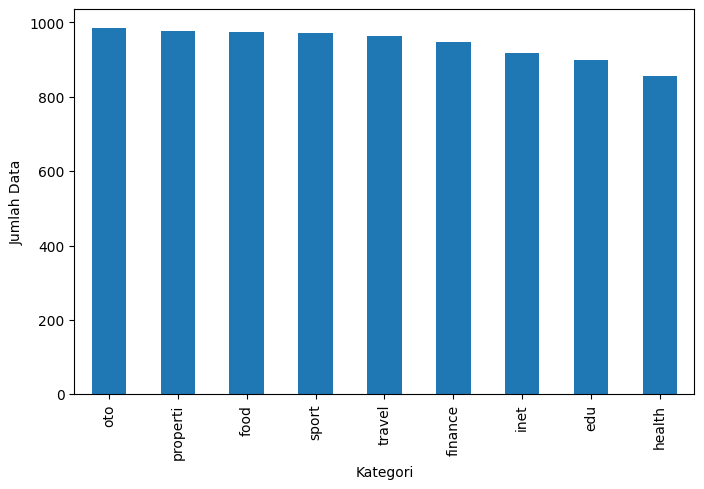

In [ ]:
import matplotlib.pyplot as plt

# plot jumlah kategori

class_count = df['kategori'].value_counts()

plt.figure(figsize=(8, 5))
class_count.plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
df.to_csv('berita.csv', index=False) # simpan ke csv

## Preprocessing Text

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

# Stopwords bahasa Indonesia dari NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus stopwords
    stop_words = set(stopwords.words('indonesian'))  # Stopwords bahasa Indonesia
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [ ]:
# Terapkan fungsi preprocess_text pada kolom 'konten'
df['clean'] = df['konten'].apply(preprocess_text)

# Tampilkan DataFrame untuk memeriksa hasil preprocessing
print(df[['konten', 'clean']].head())

                                              konten  \
0  Kementerian Keuangan (Kemenkeu) memastikan Tun...   
1  Kebijakan pengenaan tarif impor oleh Presiden ...   
2  Menteri Keuangan (Menkeu) Sri Mulyani menyebut...   
3  Kementerian Keuangan (Kemenkeu) melaporkan hin...   
4  PT Pelayaran Nasional Indonesia (Persero) atau...   

                                               clean  
0  kementerian keuangan kemenkeu tunjangan raya t...  
1  kebijakan pengenaan tarif impor presiden ameri...  
2  menteri keuangan menkeu sri mulyani menyebut d...  
3  kementerian keuangan kemenkeu melaporkan 28 fe...  
4  pt pelayaran nasional indonesia persero pelni ...  


In [ ]:
# Simpan DataFrame ke CSV
df.to_csv('berita_final.csv', index=False)

## Verifikasi

In [ ]:
# Jumlah Data
total_data = df.shape[0]
print(f"Total jumlah data: {total_data}")

Total jumlah data: 8489


In [ ]:
# Hitung jumlah data per kategori
jumlah_kategori = df['kategori'].value_counts()
print(jumlah_kategori)

kategori
oto         986
properti    976
food        975
sport       972
travel      963
finance     947
inet        917
edu         898
health      855
Name: count, dtype: int64


In [ ]:
# Hitung jumlah data yang sudah dipreprocessing
total_data_clean = df['clean'].count()
print(f"\nTotal data yang sudah dipreprocessing: {total_data_clean}")


Total data yang sudah dipreprocessing: 8489
